In [268]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [269]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="04caac49cf1c4672b5df5b1b8d4a7db8",
                                               client_secret="f57e4840b6c544f0b17d6cca3f6d24c2",
                                               redirect_uri="https://google.com",
                                               scope="user-library-read"))

In [168]:
#results = sp.current_user_saved_tracks()
#for idx, item in enumerate(results['items']):
#    track = item['track']
#    print(idx, track['artists'][0]['name'], " – ", track['name'])

__Functions__

In [96]:
def get_all_user_playlists(sp):
    playlists = []
    results = sp.current_user_playlists()
    playlists.extend(results['items'])

    while results['next']:
        results = sp.next(results)
        playlists.extend(results['items'])

    return playlists

In [167]:
# Function to get the playlist ID by name
def get_playlist_id(sp, playlist_name):
    playlists = sp.current_user_playlists()
    for playlist in playlists['items']:
        if playlist['name'] == playlist_name:
            return playlist['id']
    return None

In [98]:
def get_playlist_features(playlist_name):

    # Get the playlist ID
    playlist_id = get_playlist_id(sp, playlist_name)

    if playlist_id:
        # Fetch tracks from the playlist
        results = sp.playlist_tracks(playlist_id)
        tracks = results['items']

        # Initialize the song_list
        song_list = []

        # Iterate over the tracks and store necessary information
        while results['next']:
            results = sp.next(results)
            tracks.extend(results['items'])

        for track in tracks:
            track_info = {
                'name': track['track']['name'],
                'artist': track['track']['artists'][0]['name'],
                'album': track['track']['album']['name'],
                'uri': track['track']['uri']
            }
            song_list.append(track_info)

        # Extract the URIs from the song_list
        uris = [song['uri'] for song in song_list]

        # Fetch audio features for the tracks
        features_list = []
        for i in range(0, len(uris), 50):  # The API allows up to 100 tracks per request
            audio_features = sp.audio_features(uris[i:i+50])
            features_list.extend(audio_features)

        # Create a DataFrame
        features_df = pd.DataFrame(features_list)

        # Add song names to the DataFrame
        features_df['song_name'] = [song['name'] for song in song_list]
        features_df['artist'] = [song['artist'] for song in song_list]
        features_df['album'] = [song['album'] for song in song_list]
        features_df['uri'] = [song['uri'] for song in song_list]

        # Rearrange columns to have song name, artist, album, and uri first
        columns = ['song_name', 'artist', 'album', 'uri'] + [col for col in features_df.columns if col not in ['song_name', 'artist', 'album', 'uri']]
        features_df = features_df[columns]

        return features_df

    else:
        print(f"Playlist '{playlist_name}' not found.")
        return None


__Function II__

In [176]:
# Function to get all playlists IDs in the user's library
def get_all_playlist_ids(sp):
    all_playlist_ids = []
    offset = 0
    limit = 50  # Maximum value allowed by the API
    while True:
        playlists = sp.current_user_playlists(limit=limit, offset=offset)
        if not playlists['items']:
            break
        all_playlist_ids.extend([playlist['id'] for playlist in playlists['items']])
        offset += limit
    return all_playlist_ids

# Function to get the playlist ID by name
def get_playlist_id(sp, playlist_name):
    all_playlist_ids = get_all_playlist_ids(sp)
    for playlist_id in all_playlist_ids:
        playlist = sp.playlist(playlist_id)
        if playlist['name'] == playlist_name:
            return playlist_id
    return None

In [177]:
def get_playlist_features(playlist_name):

    # Get the playlist ID
    playlist_id = get_playlist_id(sp, playlist_name)

    if playlist_id:
        # Fetch tracks from the playlist
        results = sp.playlist_tracks(playlist_id)
        tracks = results['items']

        # Initialize the song_list
        song_list = []

        # Iterate over the tracks and store necessary information
        while results['next']:
            results = sp.next(results)
            tracks.extend(results['items'])

        for track in tracks:
            track_info = {
                'name': track['track']['name'],
                'artist': track['track']['artists'][0]['name'],
                'album': track['track']['album']['name'],
                'uri': track['track']['uri']
            }
            song_list.append(track_info)

        # Extract the URIs from the song_list
        uris = [song['uri'] for song in song_list]

        # Fetch audio features for the tracks
        features_list = []
        for i in range(0, len(uris), 50):  # The API allows up to 100 tracks per request
            audio_features = sp.audio_features(uris[i:i+50])
            features_list.extend(audio_features)

        # Create a DataFrame
        features_df = pd.DataFrame(features_list)

        # Add song names to the DataFrame
        features_df['song_name'] = [song['name'] for song in song_list]
        features_df['artist'] = [song['artist'] for song in song_list]
        features_df['album'] = [song['album'] for song in song_list]
        features_df['uri'] = [song['uri'] for song in song_list]

        # Rearrange columns to have song name, artist, album, and uri first
        columns = ['song_name', 'artist', 'album', 'uri'] + [col for col in features_df.columns if col not in ['song_name', 'artist', 'album', 'uri']]
        features_df = features_df[columns]

        return features_df

    else:
        print(f"Playlist '{playlist_name}' not found.")
        return None

__Loading Playlists__

In [183]:
mytop_2023 = get_playlist_features("Your Top Songs 2023")
mytop_2023 = mytop_2023.assign(year="2023")

mytop_2022 = get_playlist_features("Your Top Songs 2022")
mytop_2022 = mytop_2022.assign(year="2022")

mytop_2021 = get_playlist_features("Your Top Songs 2021")
mytop_2021 = mytop_2021.assign(year="2021")

mytop_2020 = get_playlist_features("Your Top Songs 2020")
mytop_2020 = mytop_2020.assign(year="2020")

mytop_2020.head()

,song_name,artist,album,uri,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,year
0,Juro Que,ROSALÍA,Juro Que,spotify:track:3ZwQCZ2LuYwuQ6R1p1CJ3w,0.645,0.495,11,-6.770,0,0.1070,...,0.333,0.6270,81.852,audio_features,3ZwQCZ2LuYwuQ6R1p1CJ3w,https://api.spotify.com/v1/tracks/3ZwQCZ2LuYwu...,https://api.spotify.com/v1/audio-analysis/3ZwQ...,170075,4,2020
1,Posthumous Forgiveness,Tame Impala,The Slow Rush,spotify:track:1KcOU0q9AMXV9xi4tSzzCc,0.367,0.613,7,-5.646,1,0.0297,...,0.282,0.0966,153.978,audio_features,1KcOU0q9AMXV9xi4tSzzCc,https://api.spotify.com/v1/tracks/1KcOU0q9AMXV...,https://api.spotify.com/v1/audio-analysis/1KcO...,366067,4,2020
2,QUE NO SALGA LA LUNA - Cap.2: Boda,ROSALÍA,El Mal Querer,spotify:track:6HpgdL4zUpuyXCzvAhgR5a,0.625,0.655,9,-5.992,0,0.1120,...,0.378,0.4850,121.075,audio_features,6HpgdL4zUpuyXCzvAhgR5a,https://api.spotify.com/v1/tracks/6HpgdL4zUpuy...,https://api.spotify.com/v1/audio-analysis/6Hpg...,269539,3,2020
3,Are U gonna tell her? (feat. MC Zaac),Tove Lo,Sunshine Kitty,spotify:track:2qoIbcyKPpe3BKifpAfh53,0.880,0.710,0,-6.114,0,0.0803,...,0.116,0.8180,117.993,audio_features,2qoIbcyKPpe3BKifpAfh53,https://api.spotify.com/v1/tracks/2qoIbcyKPpe3...,https://api.spotify.com/v1/audio-analysis/2qoI...,159819,4,2020
4,Friends or Lovers?,Orlando,Friends or Lovers?,spotify:track:3YFWo79rOtQGLL4PSU89nF,0.711,0.648,5,-10.495,1,0.0530,...,0.145,0.2360,110.049,audio_features,3YFWo79rOtQGLL4PSU89nF,https://api.spotify.com/v1/tracks/3YFWo79rOtQG...,https://api.spotify.com/v1/audio-analysis/3YFW...,144794,4,2020


In [184]:
mytop_2019 = get_playlist_features("Your Top Songs 2019")
mytop_2019 = mytop_2019.assign(year="2019")

mytop_2018 = get_playlist_features("Your Top Songs 2018")
mytop_2018 = mytop_2018.assign(year="2018")

mytop_2017 = get_playlist_features("Your Top Songs 2017")
mytop_2017 = mytop_2017.assign(year="2017")

mytop_2016 = get_playlist_features("Your Top Songs 2016")
mytop_2016 = mytop_2016.assign(year="2016")

mytop_2015 = get_playlist_features("2015 Top Tracks")
mytop_2015 = mytop_2015.assign(year="2015")

In [185]:
mytop_2015.tail()

,song_name,artist,album,uri,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,year
95,Flawless Remix (feat. Nicki Minaj),Beyoncé,BEYONCÉ [Platinum Edition],spotify:track:0zVMzJ37VQNFUNvdxxat2E,0.640,0.659,8,-7.273,1,0.2150,...,0.4840,0.4570,136.804,audio_features,0zVMzJ37VQNFUNvdxxat2E,https://api.spotify.com/v1/tracks/0zVMzJ37VQNF...,https://api.spotify.com/v1/audio-analysis/0zVM...,234413,4,2015
96,R.I.P. 2 My Youth,The Neighbourhood,R.I.P. 2 My Youth,spotify:track:1XTzZyrbu4zVuiwfhTdudE,0.365,0.669,7,-5.635,0,0.0498,...,0.1170,0.2040,94.669,audio_features,1XTzZyrbu4zVuiwfhTdudE,https://api.spotify.com/v1/tracks/1XTzZyrbu4zV...,https://api.spotify.com/v1/audio-analysis/1XTz...,205133,4,2015
97,Ghosts,Laura Marling,Alas I Cannot Swim,spotify:track:0up48KQvGzMCrgqrfT07i2,0.463,0.368,9,-11.546,1,0.0480,...,0.1490,0.7500,141.974,audio_features,0up48KQvGzMCrgqrfT07i2,https://api.spotify.com/v1/tracks/0up48KQvGzMC...,https://api.spotify.com/v1/audio-analysis/0up4...,179960,4,2015
98,Brooklyn Baby,Lana Del Rey,Brooklyn Baby,spotify:track:5bAlvENAUf8KMn2ckmQwsZ,0.404,0.664,1,-6.698,1,0.0407,...,0.1100,0.0949,107.747,audio_features,5bAlvENAUf8KMn2ckmQwsZ,https://api.spotify.com/v1/tracks/5bAlvENAUf8K...,https://api.spotify.com/v1/audio-analysis/5bAl...,351640,4,2015
99,Million Dollar Man,Lana Del Rey,Born To Die (Bonus Track Version),spotify:track:2uJ3Vh0EKPCHSDd9rb5v49,0.200,0.581,3,-6.004,0,0.0462,...,0.0662,0.5300,197.098,audio_features,2uJ3Vh0EKPCHSDd9rb5v49,https://api.spotify.com/v1/tracks/2uJ3Vh0EKPCH...,https://api.spotify.com/v1/audio-analysis/2uJ3...,230120,3,2015


In [186]:
master_df = pd.concat([mytop_2023, mytop_2022, mytop_2021, mytop_2020, mytop_2019, mytop_2018, mytop_2017, mytop_2016, mytop_2015], ignore_index=False)

In [187]:
master_df.tail()

,song_name,artist,album,uri,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,year
95,Flawless Remix (feat. Nicki Minaj),Beyoncé,BEYONCÉ [Platinum Edition],spotify:track:0zVMzJ37VQNFUNvdxxat2E,0.640,0.659,8,-7.273,1,0.2150,...,0.4840,0.4570,136.804,audio_features,0zVMzJ37VQNFUNvdxxat2E,https://api.spotify.com/v1/tracks/0zVMzJ37VQNF...,https://api.spotify.com/v1/audio-analysis/0zVM...,234413,4,2015
96,R.I.P. 2 My Youth,The Neighbourhood,R.I.P. 2 My Youth,spotify:track:1XTzZyrbu4zVuiwfhTdudE,0.365,0.669,7,-5.635,0,0.0498,...,0.1170,0.2040,94.669,audio_features,1XTzZyrbu4zVuiwfhTdudE,https://api.spotify.com/v1/tracks/1XTzZyrbu4zV...,https://api.spotify.com/v1/audio-analysis/1XTz...,205133,4,2015
97,Ghosts,Laura Marling,Alas I Cannot Swim,spotify:track:0up48KQvGzMCrgqrfT07i2,0.463,0.368,9,-11.546,1,0.0480,...,0.1490,0.7500,141.974,audio_features,0up48KQvGzMCrgqrfT07i2,https://api.spotify.com/v1/tracks/0up48KQvGzMC...,https://api.spotify.com/v1/audio-analysis/0up4...,179960,4,2015
98,Brooklyn Baby,Lana Del Rey,Brooklyn Baby,spotify:track:5bAlvENAUf8KMn2ckmQwsZ,0.404,0.664,1,-6.698,1,0.0407,...,0.1100,0.0949,107.747,audio_features,5bAlvENAUf8KMn2ckmQwsZ,https://api.spotify.com/v1/tracks/5bAlvENAUf8K...,https://api.spotify.com/v1/audio-analysis/5bAl...,351640,4,2015
99,Million Dollar Man,Lana Del Rey,Born To Die (Bonus Track Version),spotify:track:2uJ3Vh0EKPCHSDd9rb5v49,0.200,0.581,3,-6.004,0,0.0462,...,0.0662,0.5300,197.098,audio_features,2uJ3Vh0EKPCHSDd9rb5v49,https://api.spotify.com/v1/tracks/2uJ3Vh0EKPCH...,https://api.spotify.com/v1/audio-analysis/2uJ3...,230120,3,2015


In [188]:
master_df.shape

(902, 22)

In [108]:
mytop_2023['key'].mode()
key_counts = mytop_2020['key'].value_counts()
key_counts

key
0     15
4     14
1     11
7     11
9      8
11     8
6      7
8      7
2      6
5      6
10     4
3      3
Name: count, dtype: int64

In [64]:
pitch_class_map = {
        0: 'C',
        1: 'C♯/D♭',
        2: 'D',
        3: 'D♯/E♭',
        4: 'E',
        5: 'F',
        6: 'F♯/G♭',
        7: 'G',
        8: 'G♯/A♭',
        9: 'A',
        10: 'A♯/B♭',
        11: 'B'
}

# Translate numerical key values to alphabetic key values
key_counts_alphabetic = key_counts.rename(index=pitch_class_map)
key_counts_alphabetic

key
C        15
E        14
C♯/D♭    11
G        11
A         8
B         8
F♯/G♭     7
G♯/A♭     7
D         6
F         6
A♯/B♭     4
D♯/E♭     3
Name: count, dtype: int64

In [65]:
mytop_2023['acousticness'].mean()

0.5377816

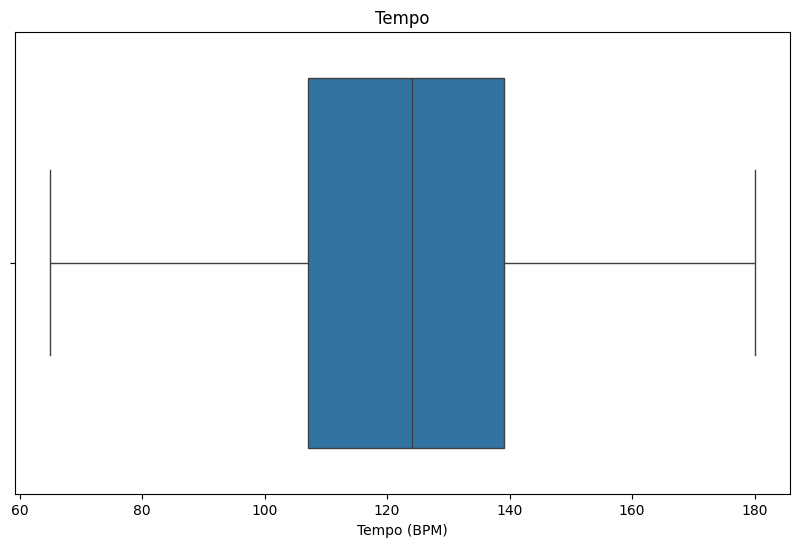

In [67]:
# Create a box plot of the 'tempo' feature
plt.figure(figsize=(10, 6))
sns.boxplot(x=mytop_2023['tempo'])
plt.title('Tempo')
plt.xlabel('Tempo (BPM)')
plt.show()


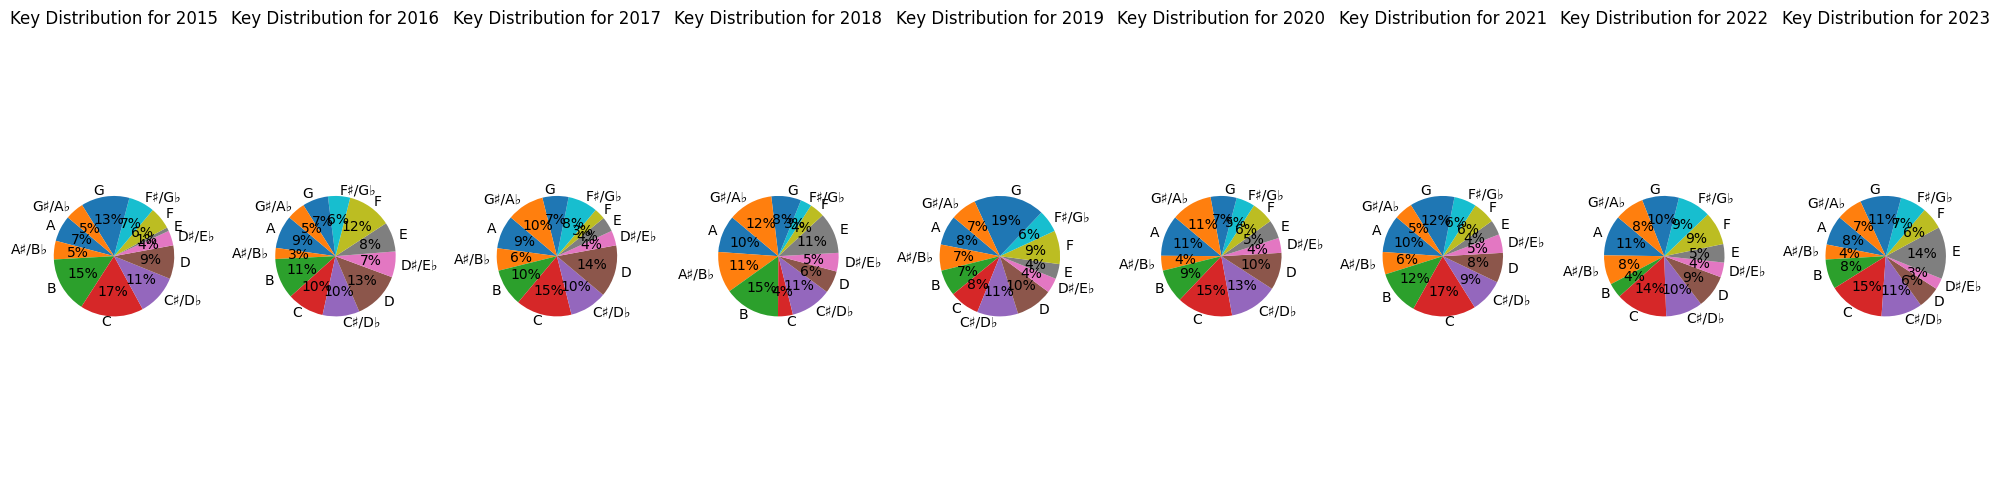

In [216]:
# Function to generate pie chart
# Function to generate pie chart
def generate_pie_chart(df, year, ax):
    # Calculate key counts for the year
    key_counts = df[df['year'] == year]['key'].value_counts()
    # Translate numerical key values to alphabetic key values
    key_counts_alphabetic = key_counts.rename(index=pitch_class_map)
    key_counts_alphabetic = key_counts_alphabetic.sort_index()
    # Generate pie chart
    ax.pie(key_counts_alphabetic, labels=key_counts_alphabetic.index, autopct='%1.0f%%', startangle=140)
    ax.set_title(f'Key Distribution for {year}')
    ax.axis('equal')

# Create subplots
fig, axs = plt.subplots(1, 9, figsize=(20, 5))

# Generate pie chart for each year
for i, year in enumerate(range(2015, 2024)):
    generate_pie_chart(master_df, str(year), axs[i])

plt.tight_layout()
plt.show()

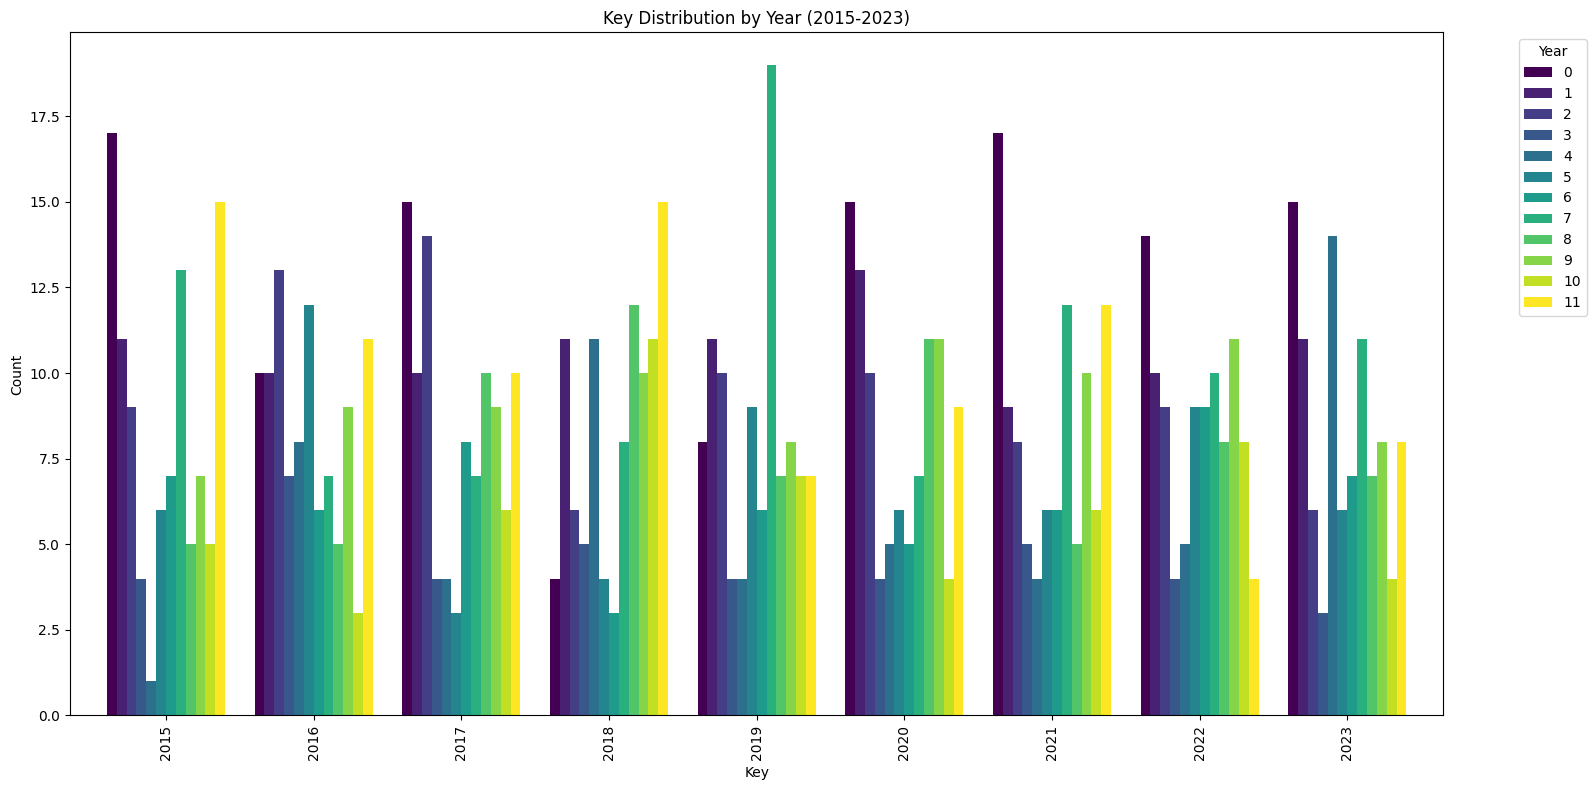

In [260]:
# Assuming pitch_class_map is defined elsewhere in your code
# Example:
pitch_class_map = {0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F', 6: 'F#', 7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'B'}

# Aggregate the data by year and key to get the counts
key_counts_by_year = master_df.groupby(['year', 'key']).size().unstack(fill_value=0)

# Translate numerical key values to alphabetic key values
key_counts_by_year = key_counts_by_year.rename(index=pitch_class_map)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(16, 8))

# Set the colors for each year
colors = plt.cm.viridis(np.linspace(0, 1, len(key_counts_by_year.columns)))

# Plot each year as a separate group
key_counts_by_year.plot(kind='bar', ax=ax, color=colors, width=0.8)

# Set labels and title
ax.set_xlabel('Key')
ax.set_ylabel('Count')
ax.set_title('Key Distribution by Year (2015-2023)')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Here we can see a histogram helps, though not in a meaningful way. For example, we cannot track the changes in Keys over each year.

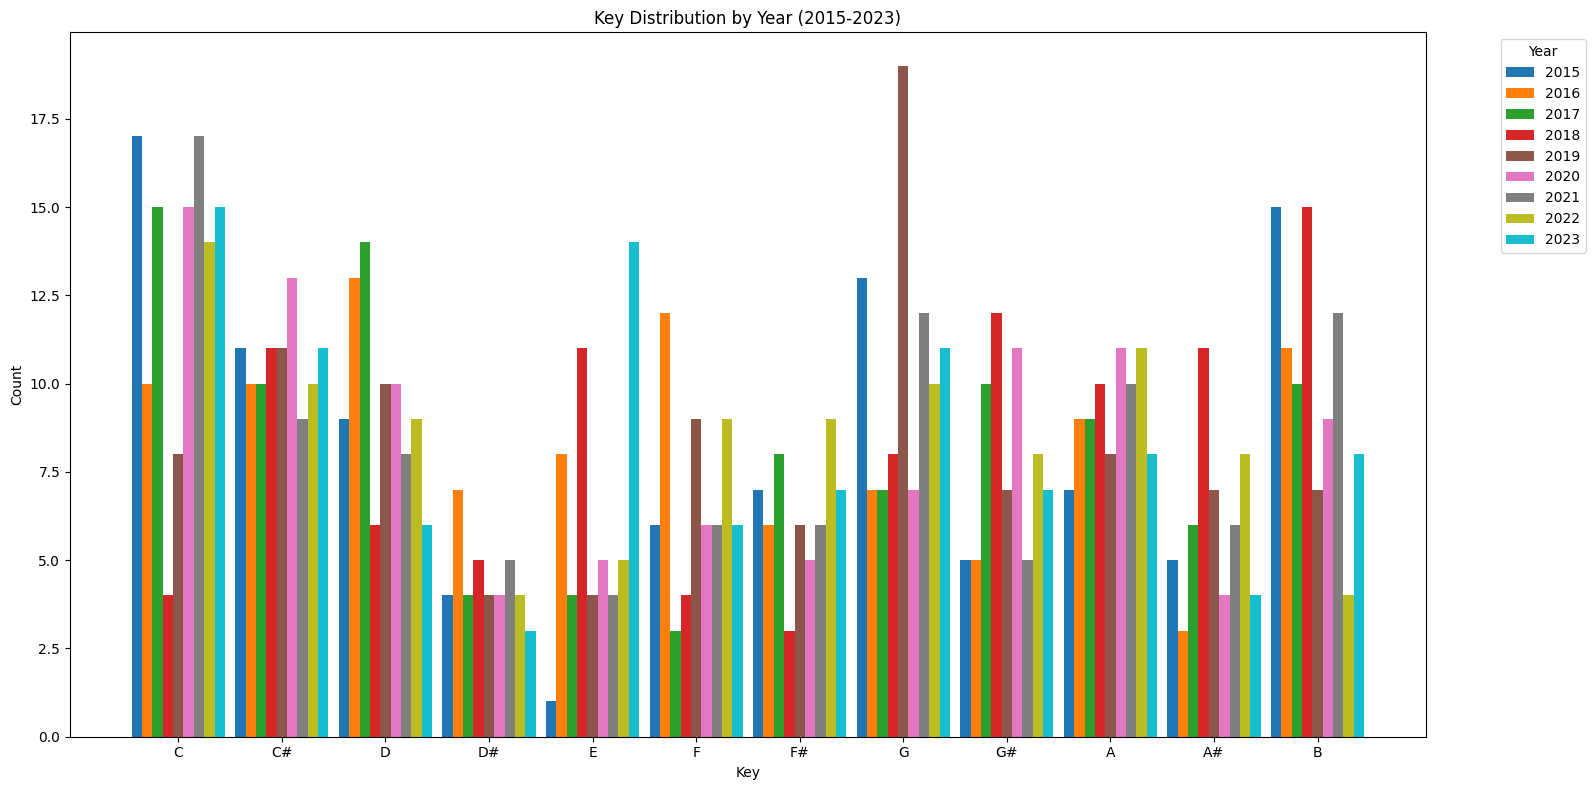

In [262]:
pitch_class_map = {0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F', 6: 'F#', 7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'B'}

# Aggregate the data by key and year to get the counts
key_counts_by_year = master_df.groupby(['key', 'year']).size().unstack(fill_value=0)

# Translate numerical key values to alphabetic key values
key_counts_by_year.index = key_counts_by_year.index.map(pitch_class_map)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(16, 8))

# Set the positions and width for the bars
positions = np.arange(len(key_counts_by_year))
bar_width = 0.1

# Set the colors for each year
colors = plt.cm.tab10(np.linspace(0, 1, key_counts_by_year.shape[1]))

# Plot each year as a separate set of bars
for i, year in enumerate(key_counts_by_year.columns):
    ax.bar(positions + i * bar_width, key_counts_by_year[year], width=bar_width, label=year, color=colors[i])

# Set labels and title
ax.set_xlabel('Key')
ax.set_ylabel('Count')
ax.set_title('Key Distribution by Year (2015-2023)')
ax.set_xticks(positions + bar_width * (key_counts_by_year.shape[1] - 1) / 2)
ax.set_xticklabels(key_counts_by_year.index)
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

This visualization is much better. We can identify each key and see how its distribution has changed over the years. For example. I listened to a lot fewer songs with a C key in 2018. B and G# were much higher. We can do a genre analysis to see what kinds of songs had this key, along with which mode (major or minor) to get a better idea of what this change meant. We can read this chart in conjunction with the previous one. 2018 I had a year of minor songs. I wonder which genre that would include. 

Similarly, 2019 I listened to a lot of songs with a key of G. They were split pretty equally between Major and Minor that year though. 

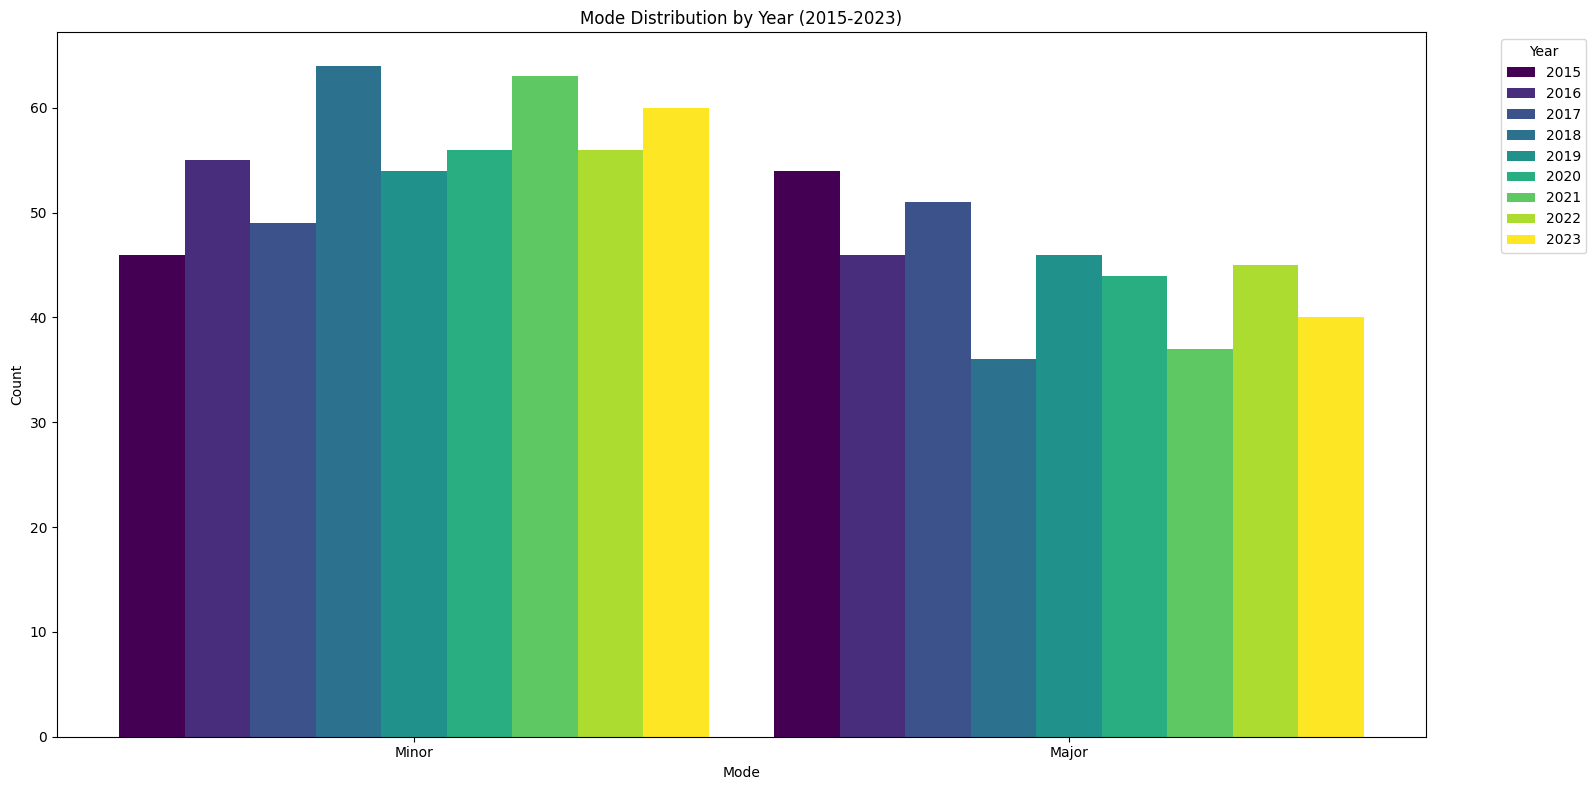

In [264]:
mode_class_map = {0: 'Minor', 1: 'Major'}

# Aggregate the data by key and year to get the counts
mode_counts_by_year = master_df.groupby(['mode', 'year']).size().unstack(fill_value=0)

# Translate numerical key values to alphabetic key values
mode_counts_by_year.index = mode_counts_by_year.index.map(mode_class_map)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(16, 8))

# Set the positions and width for the bars
positions = np.arange(len(mode_counts_by_year))
bar_width = 0.1

# Set the colors for each year
colors = plt.cm.viridis(np.linspace(0, 1, len(mode_counts_by_year.columns)))

# Plot each year as a separate set of bars
for i, year in enumerate(mode_counts_by_year.columns):
    ax.bar(positions + i * bar_width, mode_counts_by_year[year], width=bar_width, label=year, color=colors[i])

# Set labels and title
ax.set_xlabel('Mode')
ax.set_ylabel('Count')
ax.set_title('Mode Distribution by Year (2015-2023)')
ax.set_xticks(positions + bar_width * (mode_counts_by_year.shape[1] - 1) / 2)
ax.set_xticklabels(mode_counts_by_year.index)
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [132]:
master_df[master_df['year'] == "2021"]

,song_name,artist,album,uri,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,year
0,For the Time Being,Erlend Øye,For the Time Being,spotify:track:0i8nJx8tsHfRMGHDvNmNXM,0.513,0.426,7,-9.874,0,0.0462,...,0.1280,0.471,120.129,audio_features,0i8nJx8tsHfRMGHDvNmNXM,https://api.spotify.com/v1/tracks/0i8nJx8tsHfR...,https://api.spotify.com/v1/audio-analysis/0i8n...,304049,4,2021
1,Despedida,Mc Tha,Rito de Passá,spotify:track:0WU1hXQvd8IVWPVAPSBwCa,0.698,0.609,1,-7.507,0,0.0457,...,0.1220,0.448,160.039,audio_features,0WU1hXQvd8IVWPVAPSBwCa,https://api.spotify.com/v1/tracks/0WU1hXQvd8IV...,https://api.spotify.com/v1/audio-analysis/0WU1...,250000,4,2021
2,El Código del Ritmo,Mora Lucay,Bestia,spotify:track:6Q1eVsA6J5C1A3ff8I8p78,0.748,0.403,0,-10.685,0,0.0274,...,0.1250,0.467,97.008,audio_features,6Q1eVsA6J5C1A3ff8I8p78,https://api.spotify.com/v1/tracks/6Q1eVsA6J5C1...,https://api.spotify.com/v1/audio-analysis/6Q1e...,219413,4,2021
3,Blue Banisters,Lana Del Rey,Blue Banisters,spotify:track:6FpdEqPmZ9aXIXiDi0Ke0f,0.384,0.111,5,-13.179,1,0.0415,...,0.1040,0.177,85.986,audio_features,6FpdEqPmZ9aXIXiDi0Ke0f,https://api.spotify.com/v1/tracks/6FpdEqPmZ9aX...,https://api.spotify.com/v1/audio-analysis/6Fpd...,292841,3,2021
4,Bestia,Mora Lucay,Bestia,spotify:track:3xtWtUs2sKwWVamPsM9zNy,0.629,0.895,0,-5.701,0,0.0405,...,0.3750,0.954,150.049,audio_features,3xtWtUs2sKwWVamPsM9zNy,https://api.spotify.com/v1/tracks/3xtWtUs2sKwW...,https://api.spotify.com/v1/audio-analysis/3xtW...,194981,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mountains,Charlotte Day Wilson,ALPHA,spotify:track:4JvEicQI7CxOJxuI0xtpim,0.540,0.399,10,-9.127,1,0.0524,...,0.3680,0.141,117.976,audio_features,4JvEicQI7CxOJxuI0xtpim,https://api.spotify.com/v1/tracks/4JvEicQI7CxO...,https://api.spotify.com/v1/audio-analysis/4JvE...,249334,4,2021
96,The High,Kelela,Hallucinogen,spotify:track:4ePsYEI4wSp2Offhuw8RmR,0.383,0.341,10,-13.984,0,0.0363,...,0.1120,0.160,76.168,audio_features,4ePsYEI4wSp2Offhuw8RmR,https://api.spotify.com/v1/tracks/4ePsYEI4wSp2...,https://api.spotify.com/v1/audio-analysis/4ePs...,341062,4,2021
97,Casa Nueva,Patio Solar,Temporada,spotify:track:5VwSZZzIQ0MiLKaSKGRVft,0.567,0.763,6,-8.661,1,0.0285,...,0.0874,0.910,134.979,audio_features,5VwSZZzIQ0MiLKaSKGRVft,https://api.spotify.com/v1/tracks/5VwSZZzIQ0Mi...,https://api.spotify.com/v1/audio-analysis/5VwS...,181603,4,2021
98,L'envie de valser,Kimberose,Out,spotify:track:6qZSKNKWyKh0SsP6r2mEef,0.458,0.212,3,-10.669,0,0.0514,...,0.0991,0.288,95.912,audio_features,6qZSKNKWyKh0SsP6r2mEef,https://api.spotify.com/v1/tracks/6qZSKNKWyKh0...,https://api.spotify.com/v1/audio-analysis/6qZS...,205253,3,2021


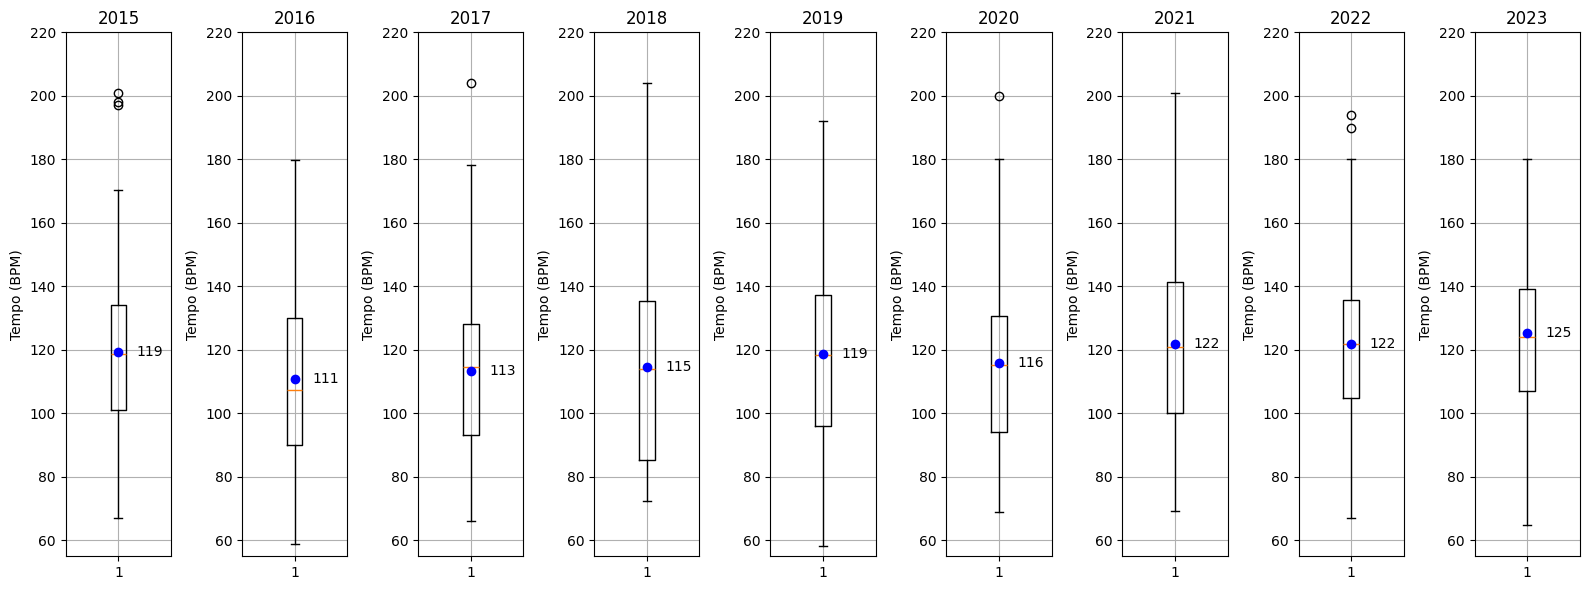

In [299]:
def generate_box_plot_for_year(df, year, ax):
    # Filter the DataFrame for the specific year
    df_year = df[df['year'] == str(year)]
    # Generate box plot for tempo feature
    ax.boxplot(df_year['tempo'])
    ax.set_title(f'{year}')
    ax.set_ylabel('Tempo (BPM)')
    ax.grid(True)
    ax.set_ylim([55, 220])  # Set the same y-axis limits for all plots
    mean_value = df_year['tempo'].mean()
    # Annotate the mean on the boxplot
    ax.annotate(f'{mean_value:.0f}', 
                xy=(1, mean_value), 
                xytext=(1.3, mean_value), 
                ha='center', va='center')
    # Add a scatter plot to show the mean
    ax.scatter(1, mean_value, color='blue', zorder=3)

# Create subplots
fig, axs = plt.subplots(1, 9, figsize=(16, 6))

# Generate box plot for each year
for i, year in enumerate(range(2015, 2024)):
    generate_box_plot_for_year(master_df, year, axs[i])

plt.tight_layout()
plt.show()

In [228]:
master_df[master_df['year'] == "2016"]["tempo"].mean()

110.9619108910891

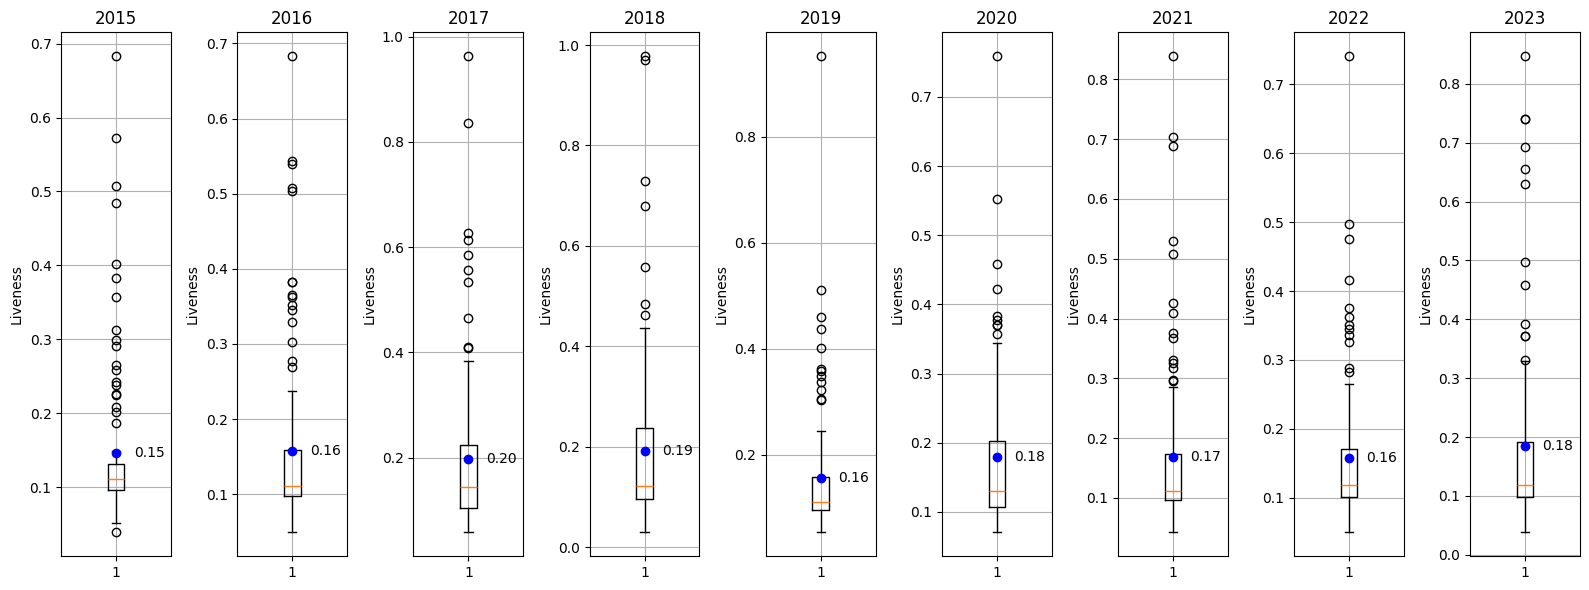

In [300]:
def generate_box_plot_for_year(df, year, ax):
    # Filter the DataFrame for the specific year
    df_year = df[df['year'] == str(year)]
    # Generate box plot for tempo feature
    ax.boxplot(df_year['liveness'])
    ax.set_title(f'{year}')
    ax.set_ylabel('Liveness')
    ax.grid(True)
    mean_value = df_year['liveness'].mean()
    # Annotate the mean on the boxplot
    ax.annotate(f'{mean_value:.2f}', 
                xy=(1, mean_value), 
                xytext=(1.3, mean_value), 
                ha='center', va='center')
    # Add a scatter plot to show the mean
    ax.scatter(1, mean_value, color='blue', zorder=3)

# Create subplots
fig, axs = plt.subplots(1, 9, figsize=(16, 6))

# Generate box plot for each year
for i, year in enumerate(range(2015, 2024)):
    generate_box_plot_for_year(master_df, year, axs[i])

plt.tight_layout()
plt.show()

In [230]:
master_df[master_df['year'] == "2022"]["energy"].mean()

0.5830742574257426

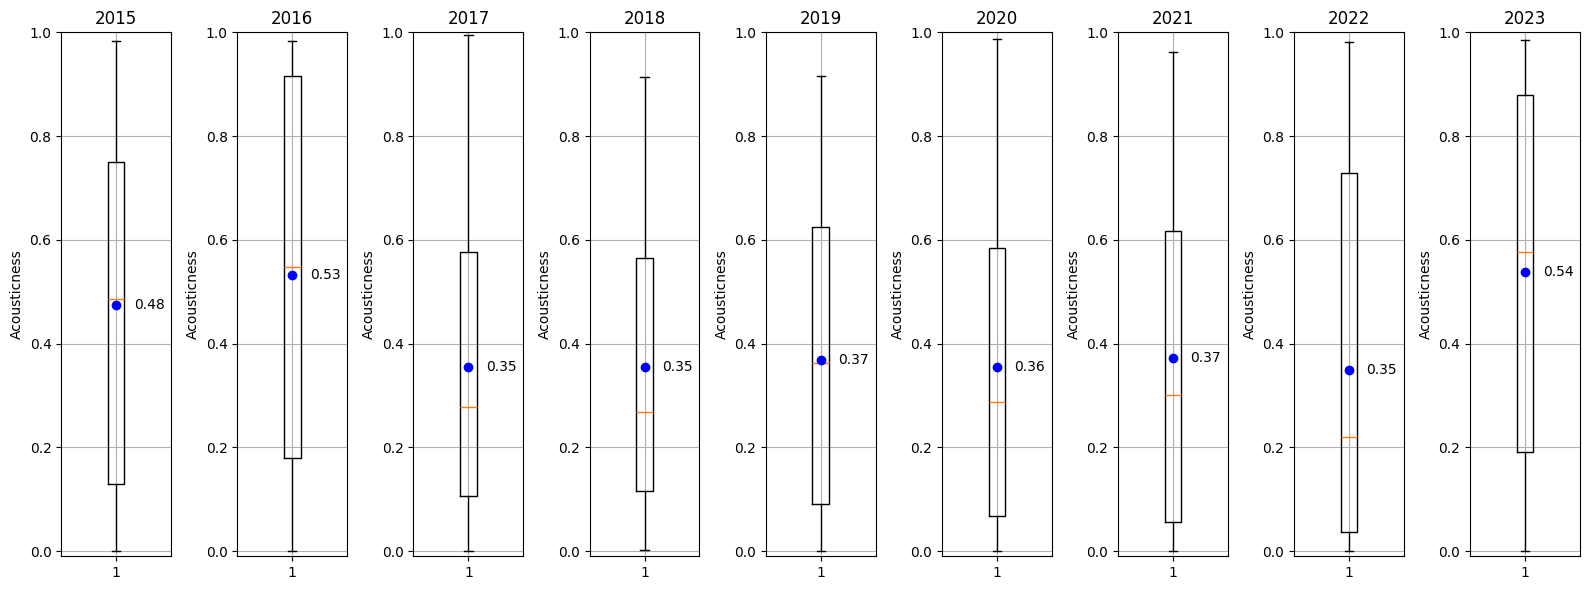

In [250]:
def generate_box_plot_for_year(df, year, ax):
    # Filter the DataFrame for the specific year
    df_year = df[df['year'] == str(year)]
    # Generate box plot for tempo feature
    ax.boxplot(df_year['acousticness'])
    ax.set_title(f' {year}')
    ax.set_ylabel('Acousticness')
    ax.grid(True)
    ax.set_ylim([-.01, 1])  # Set the same y-axis limits for all plots
    mean_value = df_year['acousticness'].mean()
    # Annotate the mean on the boxplot
    ax.annotate(f'{mean_value:.2f}', 
                xy=(1, mean_value), 
                xytext=(1.3, mean_value), 
                ha='center', va='center')
    

# Create subplots
fig, axs = plt.subplots(1, 9, figsize=(16, 6))

# Generate box plot for each year
for i, year in enumerate(range(2015, 2024)):
    generate_box_plot_for_year(master_df, year, axs[i])

plt.tight_layout()
plt.show()

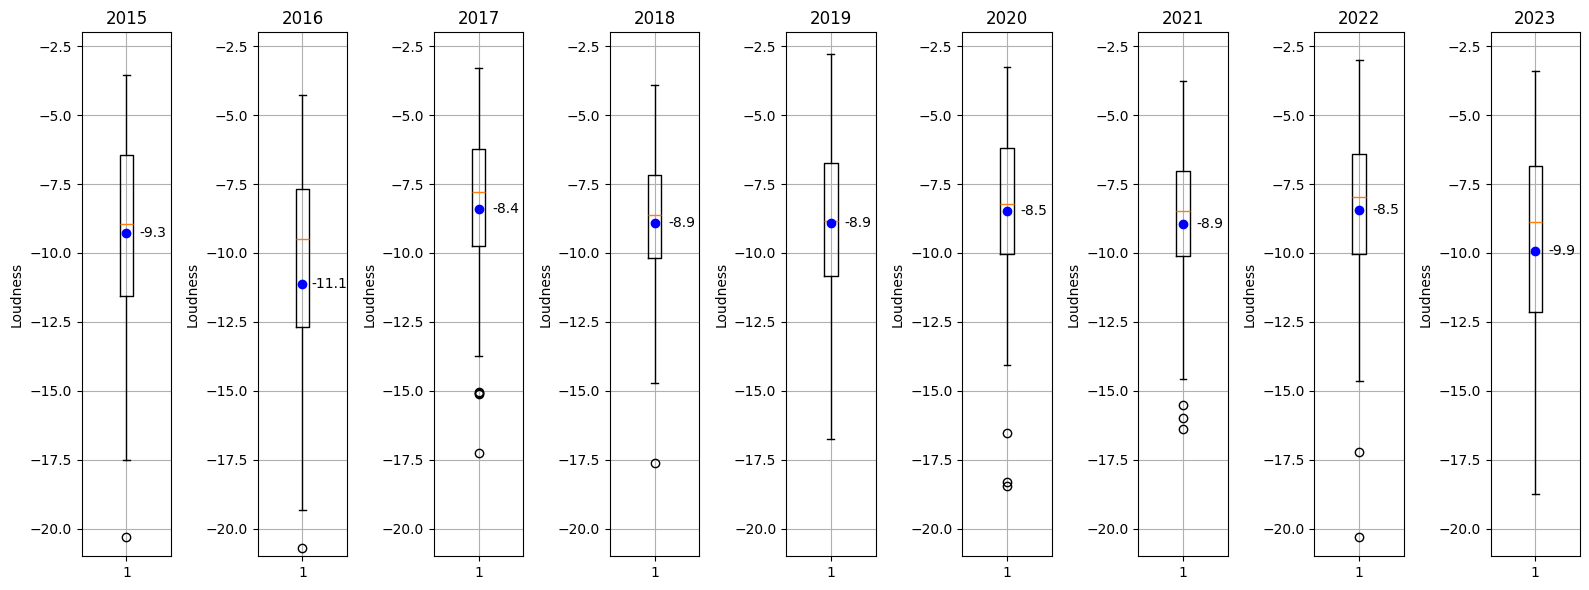

In [249]:
def generate_box_plot_for_year(df, year, ax):
    # Filter the DataFrame for the specific year
    df_year = df[df['year'] == str(year)]
    # Generate box plot for tempo feature
    ax.boxplot(df_year['loudness'])
    ax.set_title(f'{year}')
    ax.set_ylabel('Loudness')
    ax.grid(True)
    ax.set_ylim([-21, -2])  # Set the same y-axis limits for all plots
    mean_value = df_year['loudness'].mean()
    # Annotate the mean on the boxplot
    ax.annotate(f'{mean_value:.1f}', 
                xy=(1, mean_value), 
                xytext=(1.3, mean_value), 
                ha='center', va='center')
    # Add a scatter plot to show the mean
    ax.scatter(1, mean_value, color='blue', zorder=3)

# Create subplots
fig, axs = plt.subplots(1, 9, figsize=(16, 6))

# Generate box plot for each year
for i, year in enumerate(range(2015, 2024)):
    generate_box_plot_for_year(master_df, year, axs[i])

plt.tight_layout()
plt.show()

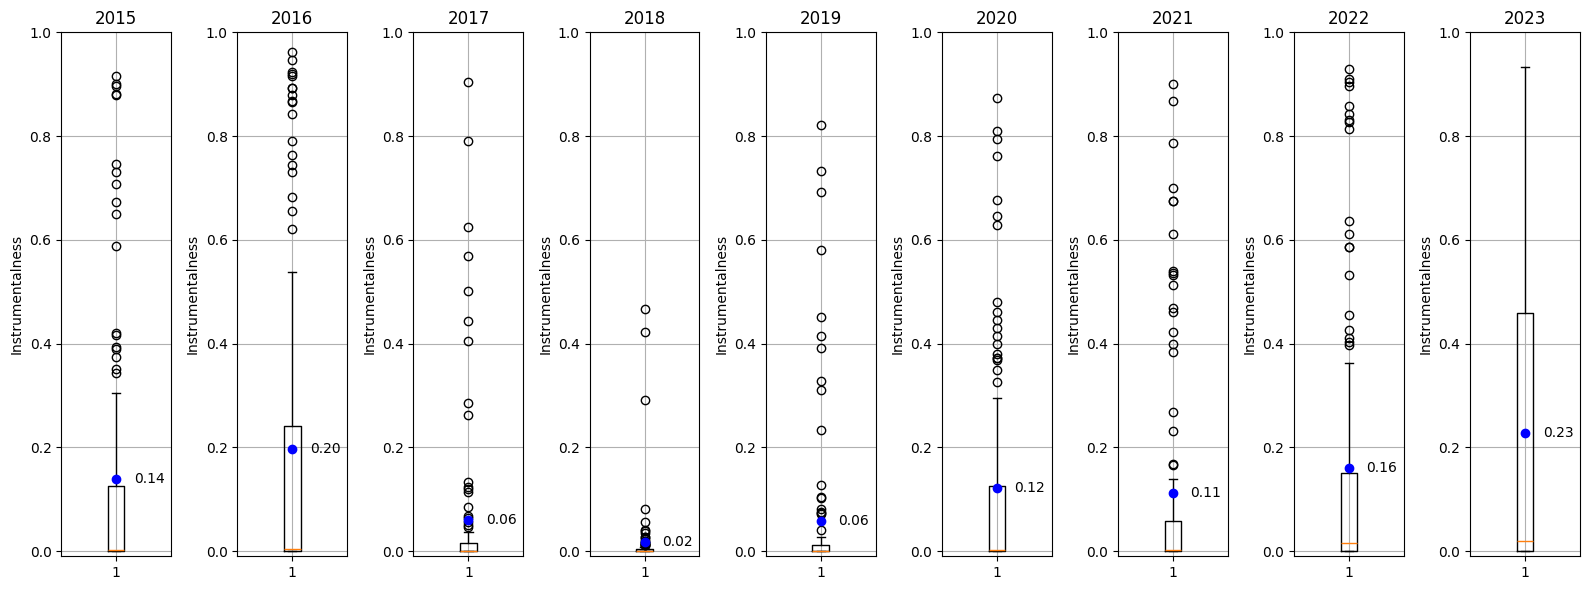

In [248]:
def generate_box_plot_for_year(df, year, ax):
    # Filter the DataFrame for the specific year
    df_year = df[df['year'] == str(year)]
    # Generate box plot for tempo feature
    ax.boxplot(df_year['instrumentalness'])
    ax.set_title(f'{year}')
    ax.set_ylabel('Instrumentalness')
    ax.grid(True)
    ax.set_ylim([-.01, 1])  # Set the same y-axis limits for all plots
    mean_value = df_year['instrumentalness'].mean()
    # Annotate the mean on the boxplot
    ax.annotate(f'{mean_value:.2f}', 
                xy=(1, mean_value), 
                xytext=(1.3, mean_value), 
                ha='center', va='center')
    # Add a scatter plot to show the mean
    ax.scatter(1, mean_value, color='blue', zorder=3)

# Create subplots
fig, axs = plt.subplots(1, 9, figsize=(16, 6))

# Generate box plot for each year
for i, year in enumerate(range(2015, 2024)):
    generate_box_plot_for_year(master_df, year, axs[i])

plt.tight_layout()
plt.show()

In [239]:
master_df[master_df['year'] == "2019"]["instrumentalness"].mean()

0.058367736899999995

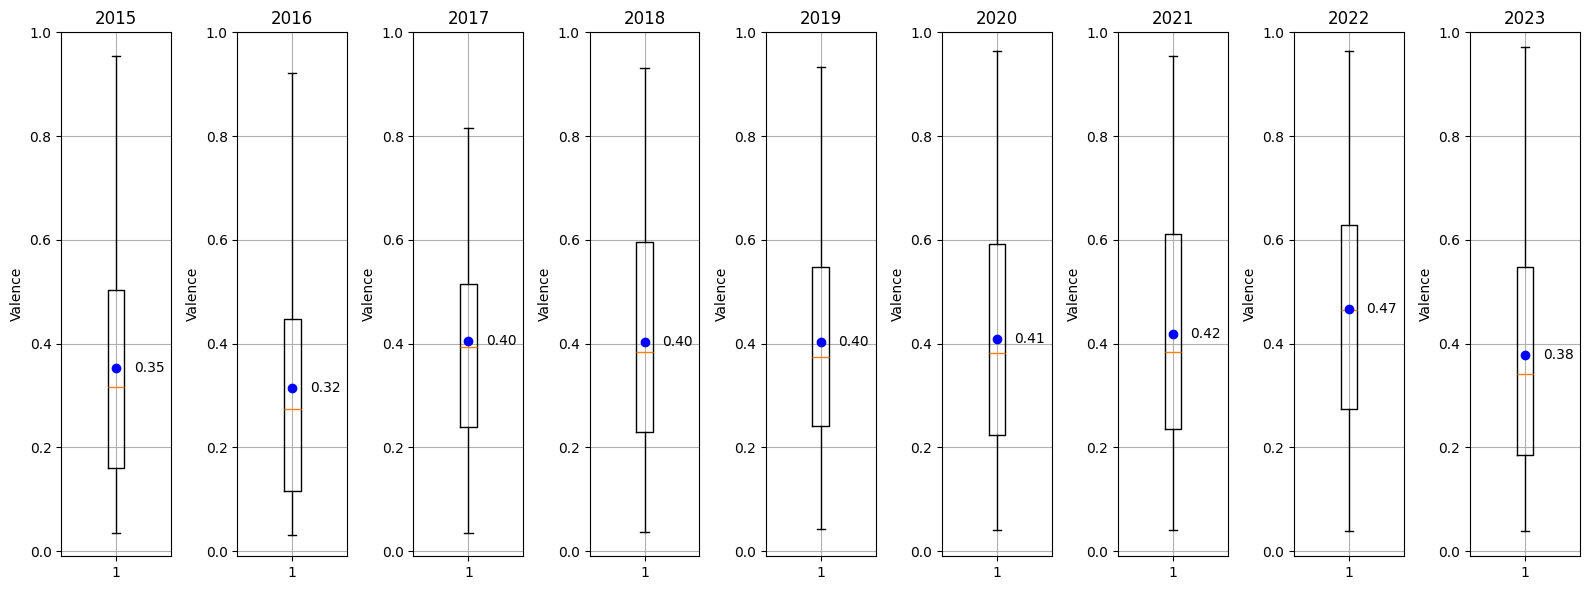

In [246]:
def generate_box_plot_for_year(df, year, ax):
    # Filter the DataFrame for the specific year
    df_year = df[df['year'] == str(year)]
    # Generate box plot for tempo feature
    ax.boxplot(df_year['valence'])
    ax.set_title(f'{year}')
    ax.set_ylabel('Valence')
    ax.grid(True)
    ax.set_ylim([-.01, 1])  # Set the same y-axis limits for all plots
    mean_value = df_year['valence'].mean()
    # Annotate the mean on the boxplot
    ax.annotate(f'{mean_value:.2f}', 
                xy=(1, mean_value), 
                xytext=(1.3, mean_value), 
                ha='center', va='center')
    # Add a scatter plot to show the mean
    ax.scatter(1, mean_value, color='blue', zorder=3)


# Create subplots
fig, axs = plt.subplots(1, 9, figsize=(16, 6))

# Generate box plot for each year
for i, year in enumerate(range(2015, 2024)):
    generate_box_plot_for_year(master_df, year, axs[i])

plt.tight_layout()
plt.show()

In [156]:
master_df['loudness'].max()

-2.993

In [265]:
def get_artist_genre(artist_name):
    try:
        # Search for the artist by name
        result = sp.search(q='artist:' + artist_name, type='artist')
        if result['artists']['items']:
            artist = result['artists']['items'][0]
            # Return the first genre if available
            return artist['genres'][0] if artist['genres'] else None
        else:
            return None
    except Exception as e:
        print(f"Error fetching genre for {artist_name}: {e}")
        return None

In [270]:
master_df['genre'] = master_df['artist'].apply(get_artist_genre)

In [271]:
master_df.head()

,song_name,artist,album,uri,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,year,genre
0,VAMPIROS,ROSALÍA,RR,spotify:track:3Eax1yebRxj6LSYpxE9Yd3,0.766,0.684,9,-4.281,0,0.0514,...,0.474,102.045,audio_features,3Eax1yebRxj6LSYpxE9Yd3,https://api.spotify.com/v1/tracks/3Eax1yebRxj6...,https://api.spotify.com/v1/audio-analysis/3Eax...,176590,4,2023,pop
1,Luna Llena,Arca,KICK ii,spotify:track:4I4p4iwxzFzdiz1WOZdZk7,0.689,0.605,4,-7.420,0,0.0737,...,0.162,96.991,audio_features,4I4p4iwxzFzdiz1WOZdZk7,https://api.spotify.com/v1/tracks/4I4p4iwxzFzd...,https://api.spotify.com/v1/audio-analysis/4I4p...,199000,4,2023,ai
2,SAOKO,ROSALÍA,MOTOMAMI,spotify:track:2FYGZDfsAnNsrm1gVbyKnG,0.827,0.768,0,-5.702,1,0.2650,...,0.734,99.988,audio_features,2FYGZDfsAnNsrm1gVbyKnG,https://api.spotify.com/v1/tracks/2FYGZDfsAnNs...,https://api.spotify.com/v1/audio-analysis/2FYG...,137533,4,2023,pop
3,You,Flansie,You,spotify:track:0qjYHI9np3bsH5tr0tX2Pk,0.553,0.797,6,-8.669,0,0.0667,...,0.100,140.031,audio_features,0qjYHI9np3bsH5tr0tX2Pk,https://api.spotify.com/v1/tracks/0qjYHI9np3bs...,https://api.spotify.com/v1/audio-analysis/0qjY...,246833,4,2023,None
4,PROVENZA,KAROL G,MAÑANA SERÁ BONITO,spotify:track:3HqcNJdZ2seoGxhn0wVNDK,0.863,0.502,1,-7.912,1,0.0496,...,0.567,111.029,audio_features,3HqcNJdZ2seoGxhn0wVNDK,https://api.spotify.com/v1/tracks/3HqcNJdZ2seo...,https://api.spotify.com/v1/audio-analysis/3Hqc...,207627,4,2023,reggaeton


In [276]:
len(master_df.genre.unique())

183

/var/folders/x5/7d32frpd66g4ck4t6hx333nc0000gn/T/ipykernel_47790/3477515954.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


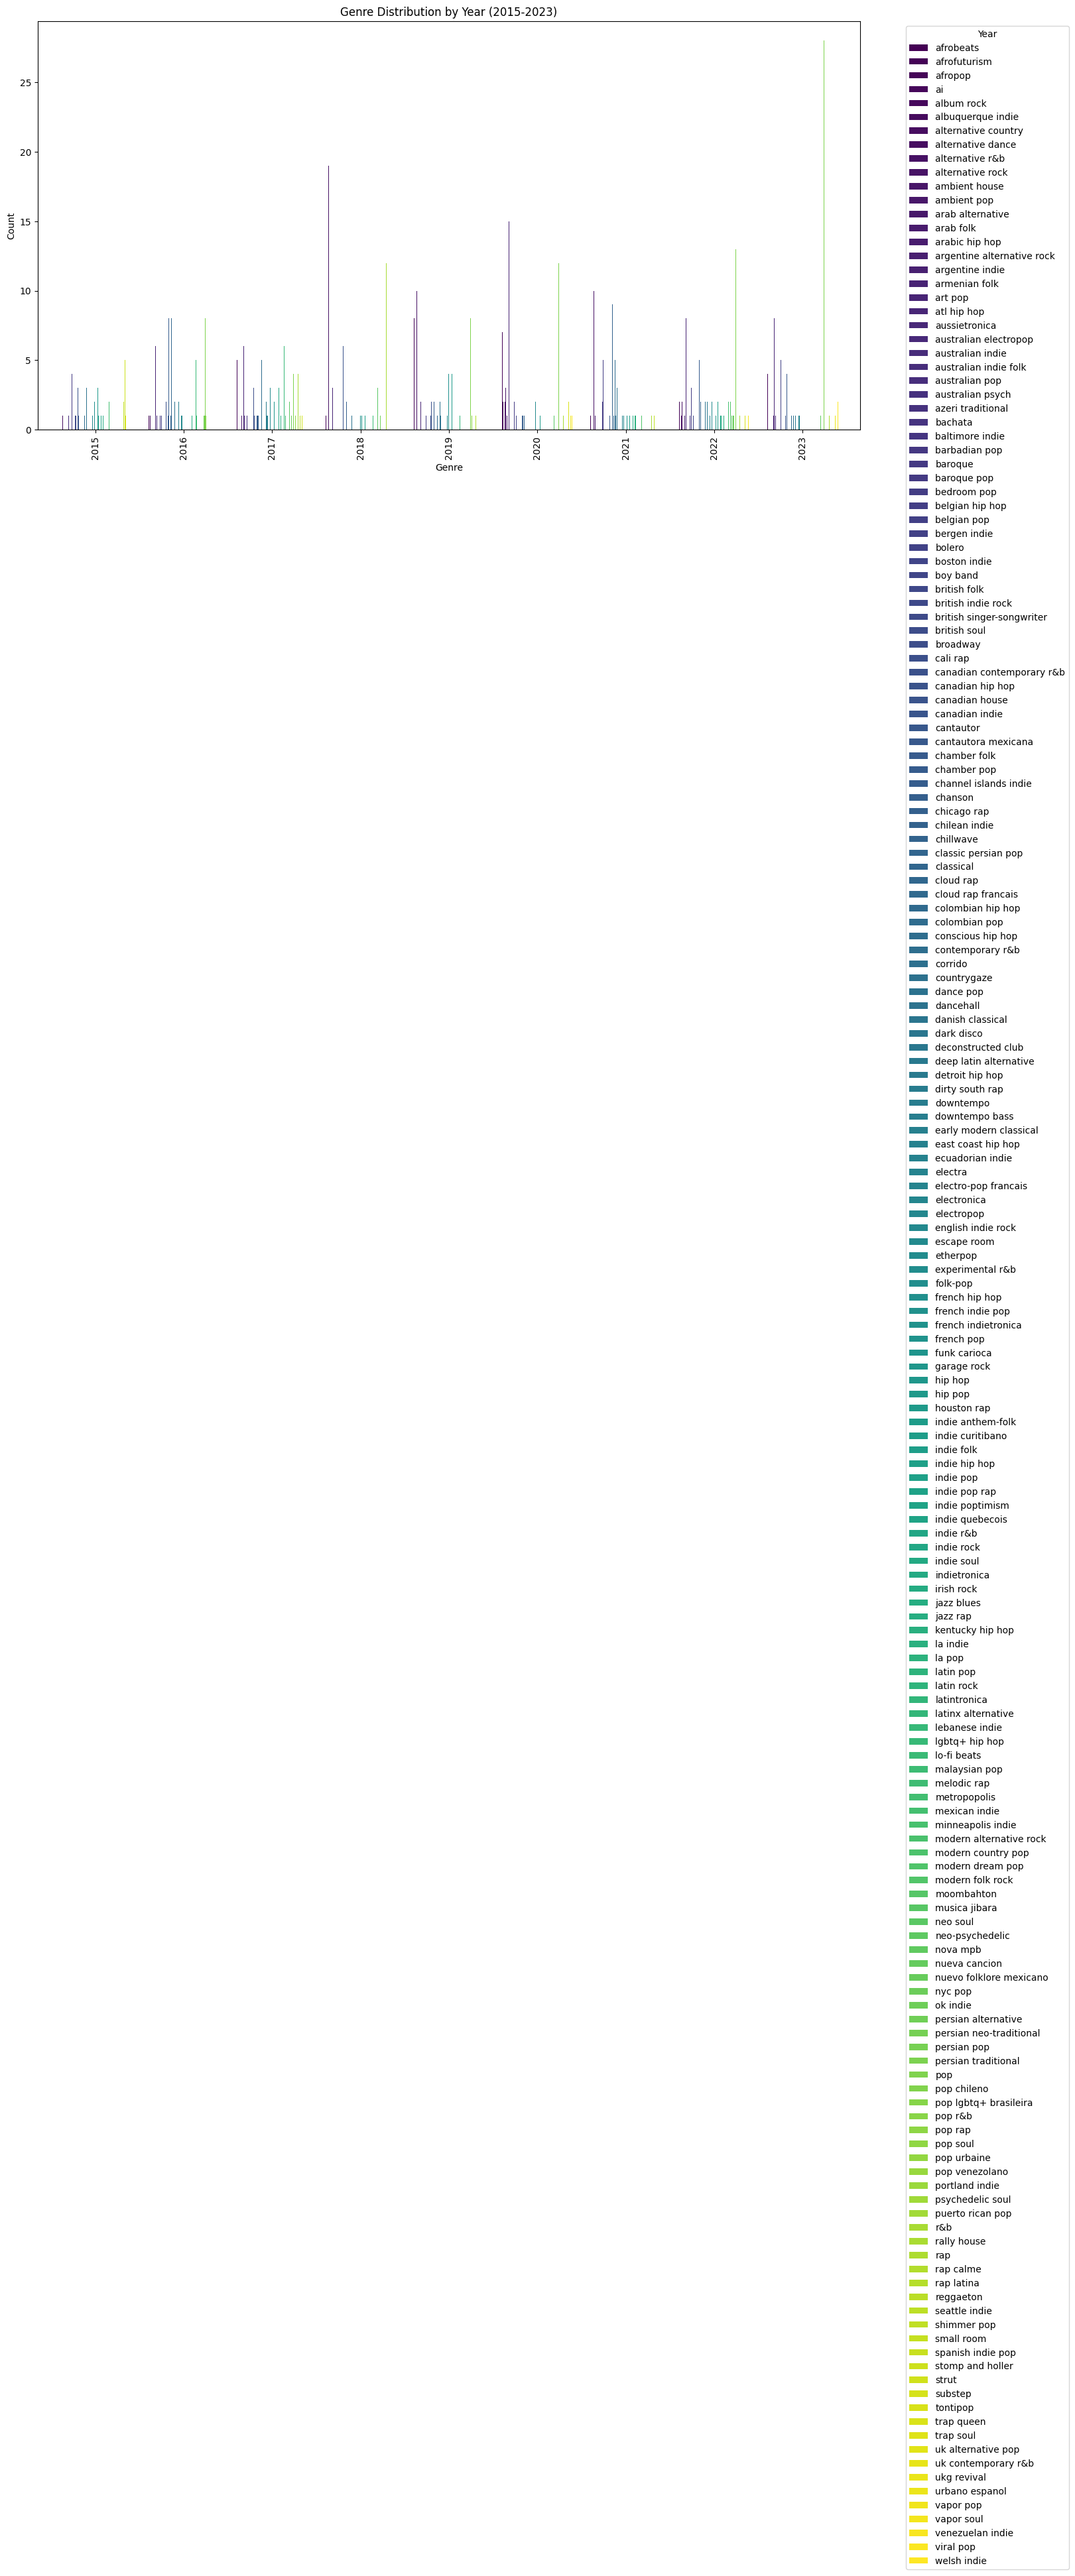

In [280]:


# Aggregate the data by year and key to get the counts
genre_counts_by_year = master_df.groupby(['year', 'genre']).size().unstack(fill_value=0)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(16, 8))

# Set the colors for each year
colors = plt.cm.viridis(np.linspace(0, 1, len(genre_counts_by_year.columns)))

# Plot each year as a separate group
genre_counts_by_year.plot(kind='bar', ax=ax, color=colors, width=0.8)

# Set labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
ax.set_title('Genre Distribution by Year (2015-2023)')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [278]:
genre_counts_by_year

genre,afrobeats,afrofuturism,afropop,ai,album rock,albuquerque indie,alternative country,alternative dance,alternative r&b,alternative rock,...,trap soul,uk alternative pop,uk contemporary r&b,ukg revival,urbano espanol,vapor pop,vapor soul,venezuelan indie,viral pop,welsh indie
year,,,,,,,,,,,,,,,,,,,,,
2015,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2016,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2017,1,5,0,0,0,4,0,0,11,0,...,0,0,0,0,0,0,0,0,0,0
2018,0,11,1,0,0,0,0,0,19,0,...,0,0,0,0,0,0,0,0,0,0
2019,5,8,0,0,0,0,0,0,10,1,...,0,0,0,0,0,0,0,0,0,0
2020,0,7,2,1,0,0,0,2,13,3,...,1,0,0,0,1,0,0,0,1,0
2021,1,3,0,0,1,0,0,0,10,0,...,0,1,0,0,0,0,0,0,0,0
2022,0,2,0,0,0,0,1,2,2,1,...,0,0,0,0,0,0,0,1,0,0
2023,0,4,0,2,0,2,0,0,0,0,...,0,0,0,1,0,1,0,0,0,2


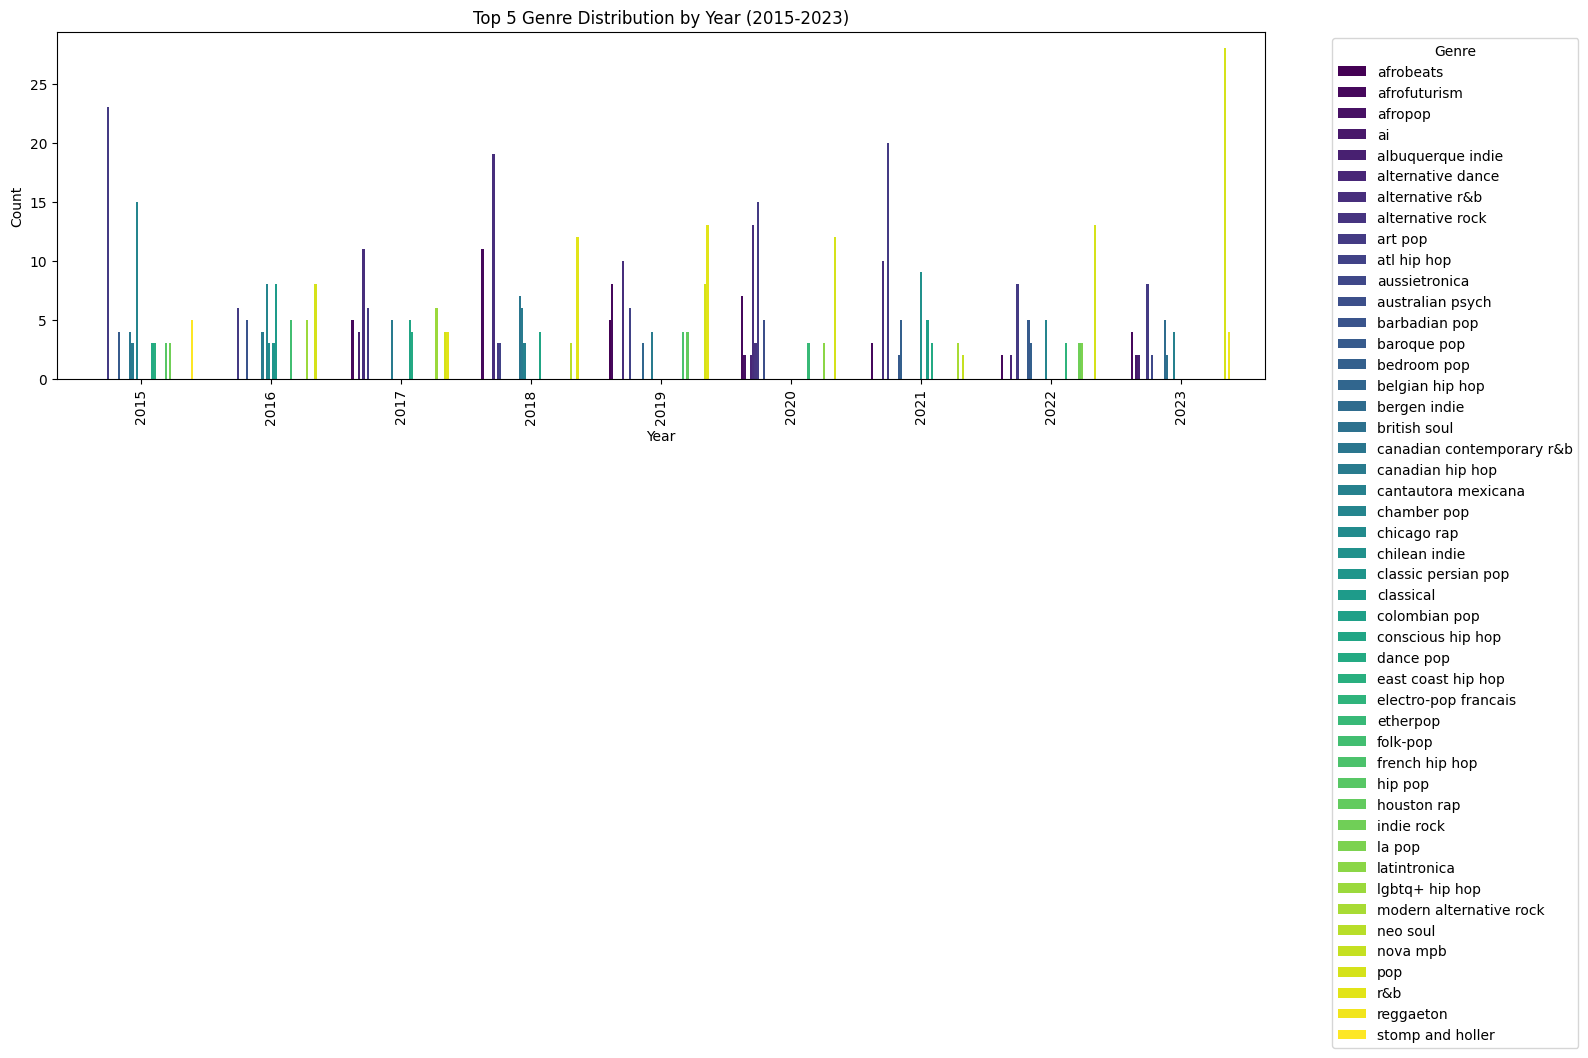

In [298]:
# Aggregate the data by year and genre to get the counts
genre_counts_by_year = master_df.groupby(['year', 'genre']).size().unstack(fill_value=0)

# Get the top 5 genres for each year
top_genres_by_year = genre_counts_by_year.apply(lambda x: x.nlargest(10), axis=1)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(16, 8))

# Set the colors for each year
colors = plt.cm.viridis(np.linspace(0, 1, len(top_genres_by_year.columns)))

# Plot each genre as a separate group
top_genres_by_year.plot(kind='bar', ax=ax, color=colors, width=0.8)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Top 5 Genre Distribution by Year (2015-2023)')
ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

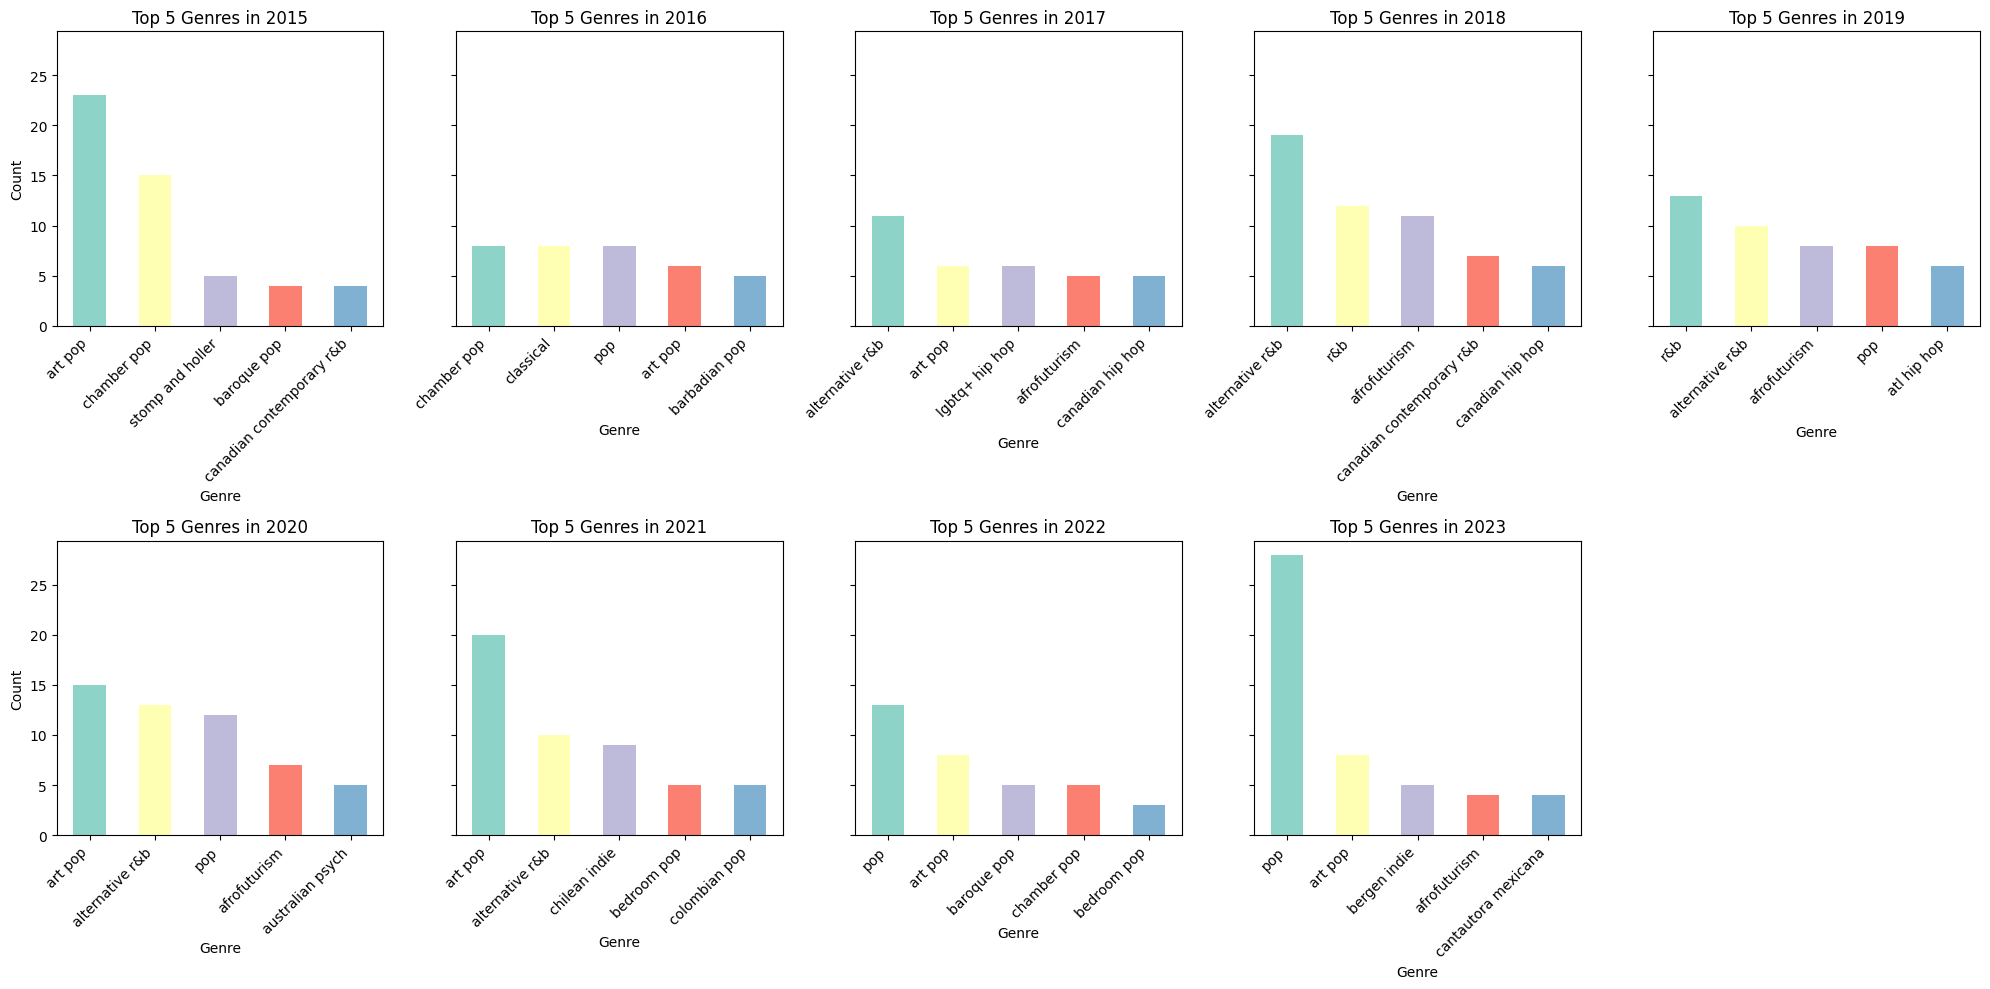

In [297]:
# Aggregate the data by year and genre to get the counts
genre_counts_by_year = master_df.groupby(['year', 'genre']).size().unstack(fill_value=0)

# Get the unique years
years = master_df['year'].unique()

# Split years into two groups
years_group_1 = sorted(years[years <= "2019"])
years_group_2 = sorted(years[years >= "2020"])

# Set up the plot grid
fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharey=True)

# Remove the last axis in the second row
fig.delaxes(axes[1, 4])

# Use a modern and Gen Z color palette
palette = sns.color_palette("Set3")

# Plot each year in the first row
for i, year in enumerate(years_group_1):
    ax = axes[0, i]
    # Get the top 5 genres for the year
    top_genres = genre_counts_by_year.loc[year].nlargest(5)
    # Plot the bar chart
    top_genres.plot(kind='bar', ax=ax, color=palette)
    ax.set_title(f'Top 5 Genres in {year}')
    ax.set_xlabel('Genre')
    ax.set_ylabel('Count')
    ax.set_xticklabels(top_genres.index, rotation=45, ha='right')

# Plot each year in the second row
for i, year in enumerate(years_group_2):
    ax = axes[1, i]
    # Get the top 5 genres for the year
    top_genres = genre_counts_by_year.loc[year].nlargest(5)
    # Plot the bar chart
    top_genres.plot(kind='bar', ax=ax, color=palette)
    ax.set_title(f'Top 5 Genres in {year}')
    ax.set_xlabel('Genre')
    ax.set_ylabel('Count')
    ax.set_xticklabels(top_genres.index, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

In [171]:
mytop_2019 = get_playlist_features("Your Top Songs 2019")

In [175]:
mytop_2019.head()

,song_name,artist,album,uri,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,Binz,Solange,When I Get Home,spotify:track:7yvdp8dqmxExSJwT2fn6Xq,0.863,0.625,8,-6.323,1,0.3130,...,0.000004,0.166,0.456,83.980,audio_features,7yvdp8dqmxExSJwT2fn6Xq,https://api.spotify.com/v1/tracks/7yvdp8dqmxEx...,https://api.spotify.com/v1/audio-analysis/7yvd...,111227,4
1,Good At,Megan Thee Stallion,Tina Snow,spotify:track:2Nzh0LjKLJ4rzxvwkKy8SP,0.808,0.641,7,-7.402,0,0.0676,...,0.000000,0.459,0.381,100.489,audio_features,2Nzh0LjKLJ4rzxvwkKy8SP,https://api.spotify.com/v1/tracks/2Nzh0LjKLJ4r...,https://api.spotify.com/v1/audio-analysis/2Nzh...,230647,4
2,Jade (feat. Blood Orange),Lolo Zouaï,Ocean Beach,spotify:track:6HMJztEGXVZgkPICDvH2yx,0.594,0.321,7,-8.876,1,0.1160,...,0.001710,0.245,0.109,159.941,audio_features,6HMJztEGXVZgkPICDvH2yx,https://api.spotify.com/v1/tracks/6HMJztEGXVZg...,https://api.spotify.com/v1/audio-analysis/6HMJ...,166493,4
3,Big Ole Freak,Megan Thee Stallion,Tina Snow,spotify:track:3YEbLhXRDPTtctnb3ddg8g,0.799,0.699,2,-7.694,1,0.2040,...,0.000000,0.132,0.627,142.979,audio_features,3YEbLhXRDPTtctnb3ddg8g,https://api.spotify.com/v1/tracks/3YEbLhXRDPTt...,https://api.spotify.com/v1/audio-analysis/3YEb...,214851,4
4,Before I Let Go - Homecoming Live Bonus Track,Beyoncé,HOMECOMING: THE LIVE ALBUM,spotify:track:7LikBkHerFGZ58QHVOKp1t,0.710,0.842,6,-5.424,0,0.0944,...,0.000000,0.337,0.435,102.994,audio_features,7LikBkHerFGZ58QHVOKp1t,https://api.spotify.com/v1/tracks/7LikBkHerFGZ...,https://api.spotify.com/v1/audio-analysis/7Lik...,240777,4


In [312]:
high_tempo = master_df[master_df['tempo'] > 200]

In [313]:
high_tempo

,song_name,artist,album,uri,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,year,genre
28,Chemtrails Over The Country Club,Lana Del Rey,Chemtrails Over The Country Club,spotify:track:1PZDyestTVydtHpaIcfUJg,0.334,0.276,4,-13.125,0,0.0643,...,0.4290,201.025,audio_features,1PZDyestTVydtHpaIcfUJg,https://api.spotify.com/v1/tracks/1PZDyestTVyd...,https://api.spotify.com/v1/audio-analysis/1PZD...,271177,3,2021,art pop
93,Violence - Club Mix,Grimes,Violence,spotify:track:5MQz02DFkMOzvgmSC2eAYI,0.457,0.817,8,-4.232,1,0.0682,...,0.1190,200.024,audio_features,5MQz02DFkMOzvgmSC2eAYI,https://api.spotify.com/v1/tracks/5MQz02DFkMOz...,https://api.spotify.com/v1/audio-analysis/5MQz...,249600,4,2020,art pop
51,Get Free,Lana Del Rey,Lust For Life,spotify:track:761QvVHTibYjEi2r6A4g4Q,0.205,0.472,10,-10.450,1,0.0718,...,0.0392,203.944,audio_features,761QvVHTibYjEi2r6A4g4Q,https://api.spotify.com/v1/tracks/761QvVHTibYj...,https://api.spotify.com/v1/audio-analysis/761Q...,334294,4,2018,art pop
24,Get Free,Lana Del Rey,Lust For Life,spotify:track:761QvVHTibYjEi2r6A4g4Q,0.205,0.472,10,-10.450,1,0.0718,...,0.0392,203.944,audio_features,761QvVHTibYjEi2r6A4g4Q,https://api.spotify.com/v1/tracks/761QvVHTibYj...,https://api.spotify.com/v1/audio-analysis/761Q...,334294,4,2017,art pop
70,Florida Kilos,Lana Del Rey,Ultraviolence (Deluxe),spotify:track:0iQPnK3bi7O27c5T2HBTdr,0.266,0.513,0,-7.852,1,0.0388,...,0.5790,200.781,audio_features,0iQPnK3bi7O27c5T2HBTdr,https://api.spotify.com/v1/tracks/0iQPnK3bi7O2...,https://api.spotify.com/v1/audio-analysis/0iQP...,256040,4,2015,art pop


In [340]:
g_major = master_df[(master_df['key'] == 7) & (master_df['mode'] == 1)]
g_major

,song_name,artist,album,uri,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,year,genre
13,Bruises,Kelela,Raven,spotify:track:5EKjnrnyrw688C3yoMfbwK,0.6190,0.6020,7,-12.219,1,0.1370,...,0.1060,129.844,audio_features,5EKjnrnyrw688C3yoMfbwK,https://api.spotify.com/v1/tracks/5EKjnrnyrw68...,https://api.spotify.com/v1/audio-analysis/5EKj...,255402,4,2023,afrofuturism
26,Abcdefg,ROSALÍA,MOTOMAMI,spotify:track:1V32pCGXZMgcmXd5MUMDL1,0.7170,0.1640,7,-17.948,1,0.9440,...,0.3520,91.577,audio_features,1V32pCGXZMgcmXd5MUMDL1,https://api.spotify.com/v1/tracks/1V32pCGXZMgc...,https://api.spotify.com/v1/audio-analysis/1V32...,65960,3,2023,pop
29,I Couldn't Love You More,Sade,Love Deluxe,spotify:track:104gvc1JDyW1PXCW9GCP17,0.7490,0.1600,7,-18.744,1,0.0307,...,0.2060,98.148,audio_features,104gvc1JDyW1PXCW9GCP17,https://api.spotify.com/v1/tracks/104gvc1JDyW1...,https://api.spotify.com/v1/audio-analysis/104g...,228293,4,2023,british soul
30,DESPECHÁ,ROSALÍA,MOTOMAMI +,spotify:track:53tfEupEzQRtVFOeZvk7xq,0.9140,0.6220,7,-6.538,1,0.0892,...,0.7700,130.040,audio_features,53tfEupEzQRtVFOeZvk7xq,https://api.spotify.com/v1/tracks/53tfEupEzQRt...,https://api.spotify.com/v1/audio-analysis/53tf...,156788,4,2023,pop
43,The Grants,Lana Del Rey,Did you know that there's a tunnel under Ocean...,spotify:track:3KbOflJ5JqHWtmco4PiO3h,0.3660,0.1560,7,-12.394,1,0.0352,...,0.1310,121.457,audio_features,3KbOflJ5JqHWtmco4PiO3h,https://api.spotify.com/v1/tracks/3KbOflJ5JqHW...,https://api.spotify.com/v1/audio-analysis/3KbO...,295202,4,2023,art pop
55,20inch Chrome,DJ Europarking,Bitte Everyday!,spotify:track:1v7Q3UPfnigXASLANpu0UF,0.5940,0.6440,7,-12.608,1,0.0505,...,0.2110,149.983,audio_features,1v7Q3UPfnigXASLANpu0UF,https://api.spotify.com/v1/tracks/1v7Q3UPfnigX...,https://api.spotify.com/v1/audio-analysis/1v7Q...,308600,4,2023,None
92,Me Voy a Valparaíso,Diego Lorenzini,De Algo Hay Que Morir,spotify:track:1whuGreIX1sYRDeT28nhyp,0.5980,0.4050,7,-11.452,1,0.0332,...,0.5100,178.520,audio_features,1whuGreIX1sYRDeT28nhyp,https://api.spotify.com/v1/tracks/1whuGreIX1sY...,https://api.spotify.com/v1/audio-analysis/1whu...,240576,3,2023,chilean indie
6,Void,Kilo Kish,mothe,spotify:track:09hFzxySPHV6PMWUiW91Di,0.4090,0.7530,7,-7.271,1,0.0913,...,0.2040,133.301,audio_features,09hFzxySPHV6PMWUiW91Di,https://api.spotify.com/v1/tracks/09hFzxySPHV6...,https://api.spotify.com/v1/audio-analysis/09hF...,183642,4,2022,alternative r&b
8,Palace - Foals Remix,Wild Beasts,Present Tense (Special Edition),spotify:track:10xkFfw9QBrV2wadWCREBn,0.5340,0.6310,7,-7.792,1,0.0285,...,0.0904,129.968,audio_features,10xkFfw9QBrV2wadWCREBn,https://api.spotify.com/v1/tracks/10xkFfw9QBrV...,https://api.spotify.com/v1/audio-analysis/10xk...,378773,4,2022,alternative dance
27,DESPECHÁ,ROSALÍA,DESPECHÁ,spotify:track:5ildQOEKmJuWGl2vRkFdYc,0.9190,0.6230,7,-6.521,1,0.0992,...,0.7750,130.037,audio_features,5ildQOEKmJuWGl2vRkFdYc,https://api.spotify.com/v1/tracks/5ildQOEKmJuW...,https://api.spotify.com/v1/audio-analysis/5ild...,157018,4,2022,pop


In [352]:
g_minor = master_df[(master_df['key'] == 7) & (master_df['mode'] == 0)]
g_minor

,song_name,artist,album,uri,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,year,genre
33,A Place To Lie,Art School Girlfriend,Soft Landing,spotify:track:692sZWA4Xqby6p8EKfu4ZS,0.508,0.722,7,-8.204,0,0.0265,...,0.1870,149.005,audio_features,692sZWA4Xqby6p8EKfu4ZS,https://api.spotify.com/v1/tracks/692sZWA4Xqby...,https://api.spotify.com/v1/audio-analysis/692s...,323211,4,2023,welsh indie
42,COMO UN G,ROSALÍA,MOTOMAMI,spotify:track:7MDfNYdpdohHjmFsYK44KU,0.496,0.130,7,-14.396,0,0.0415,...,0.2200,133.070,audio_features,7MDfNYdpdohHjmFsYK44KU,https://api.spotify.com/v1/tracks/7MDfNYdpdohH...,https://api.spotify.com/v1/audio-analysis/7MDf...,262200,4,2023,pop
50,HENTAI,ROSALÍA,MOTOMAMI,spotify:track:4kroNlz8BTfswE4M0i3YCh,0.583,0.297,7,-11.273,0,0.4060,...,0.2910,124.279,audio_features,4kroNlz8BTfswE4M0i3YCh,https://api.spotify.com/v1/tracks/4kroNlz8BTfs...,https://api.spotify.com/v1/audio-analysis/4kro...,162907,3,2023,pop
98,I Would Die 4 U,Art School Girlfriend,I Would Die 4 U,spotify:track:2t3dEAfAPpCOyxFwN55UTz,0.567,0.558,7,-13.556,0,0.0336,...,0.0382,109.982,audio_features,2t3dEAfAPpCOyxFwN55UTz,https://api.spotify.com/v1/tracks/2t3dEAfAPpCO...,https://api.spotify.com/v1/audio-analysis/2t3d...,199062,4,2023,welsh indie
3,Wintersong,Blake Mills,Blake Mills,spotify:track:4yXl4ddCMdM7TTDcylRzLP,0.473,0.756,7,-8.219,0,0.0619,...,0.7380,117.688,audio_features,4yXl4ddCMdM7TTDcylRzLP,https://api.spotify.com/v1/tracks/4yXl4ddCMdM7...,https://api.spotify.com/v1/audio-analysis/4yXl...,256443,4,2022,modern folk rock
48,Wildflower Wildfire,Lana Del Rey,Blue Banisters,spotify:track:7fvTXmlzhOUE7WUD6aJC4N,0.547,0.205,7,-10.021,0,0.0277,...,0.2220,105.745,audio_features,7fvTXmlzhOUE7WUD6aJC4N,https://api.spotify.com/v1/tracks/7fvTXmlzhOUE...,https://api.spotify.com/v1/audio-analysis/7fvT...,287840,3,2022,art pop
98,All You Deliver,José González,Veneer,spotify:track:25errEMDSyM2OQitbvhooI,0.364,0.107,7,-20.297,0,0.0396,...,0.0951,94.366,audio_features,25errEMDSyM2OQitbvhooI,https://api.spotify.com/v1/tracks/25errEMDSyM2...,https://api.spotify.com/v1/audio-analysis/25er...,140027,3,2022,chamber pop
0,For the Time Being,Erlend Øye,For the Time Being,spotify:track:0i8nJx8tsHfRMGHDvNmNXM,0.513,0.426,7,-9.874,0,0.0462,...,0.4710,120.129,audio_features,0i8nJx8tsHfRMGHDvNmNXM,https://api.spotify.com/v1/tracks/0i8nJx8tsHfR...,https://api.spotify.com/v1/audio-analysis/0i8n...,304049,4,2021,bergen indie
18,Wildflower Wildfire,Lana Del Rey,Wildflower Wildfire,spotify:track:5WhzJEUErG4gdSqxNCB9ED,0.352,0.224,7,-10.026,0,0.0323,...,0.2110,79.592,audio_features,5WhzJEUErG4gdSqxNCB9ED,https://api.spotify.com/v1/tracks/5WhzJEUErG4g...,https://api.spotify.com/v1/audio-analysis/5Whz...,286741,5,2021,art pop
25,Dembow Y Sexo,La Doña,Algo Nuevo,spotify:track:6TqtJukzedHvlVkM8KGnQU,0.679,0.678,7,-5.472,0,0.0288,...,0.7270,95.019,audio_features,6TqtJukzedHvlVkM8KGnQU,https://api.spotify.com/v1/tracks/6TqtJukzedHv...,https://api.spotify.com/v1/audio-analysis/6Tqt...,195579,4,2021,latinx alternative


In [328]:
len(g_songs.genre.unique())

42

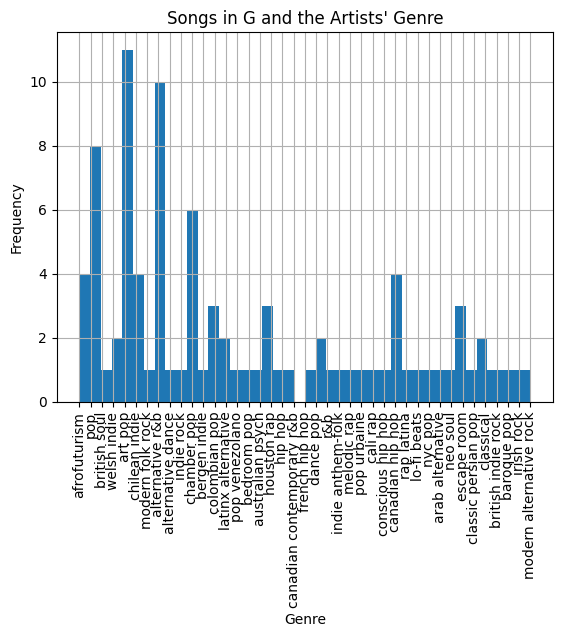

In [329]:
hist = g_songs['genre'].hist(bins=len(g_songs.genre.unique())) 
  

plt.title('Songs in G and the Artists\' Genre') 
plt.xlabel('Genre') 
plt.ylabel('Frequency') 
plt.xticks(rotation=90)
plt.show()

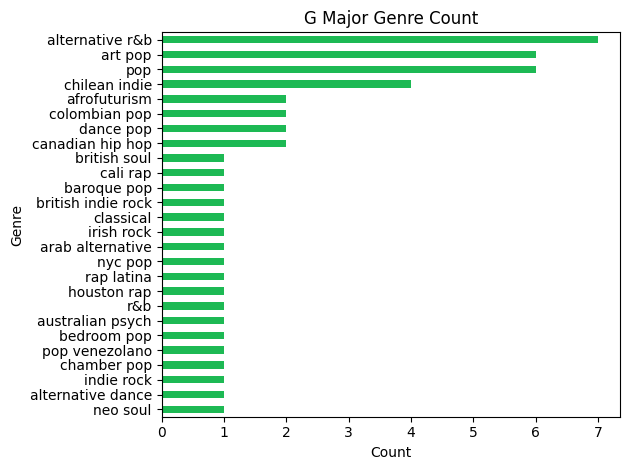

In [346]:
genre_counts = g_major['genre'].value_counts()

# Sort the genres by their counts in descending order
sorted_genres = genre_counts.sort_values(ascending=True)

# Plot the histogram
hist = sorted_genres.plot(kind='barh', color='#1DB954')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('G Major Genre Count')
#plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

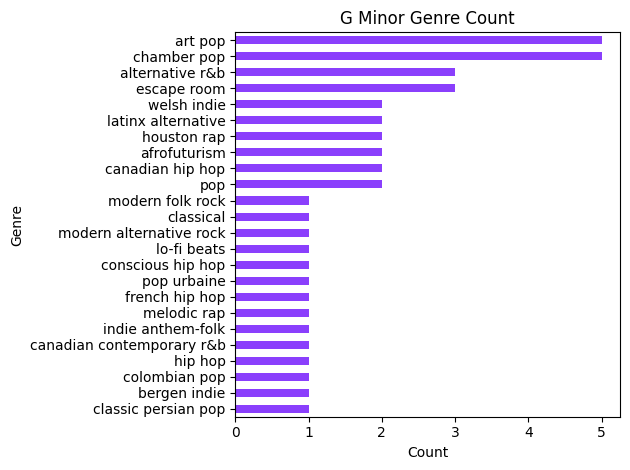

In [347]:
genre_counts = g_minor['genre'].value_counts()

# Sort the genres by their counts in descending order
sorted_genres = genre_counts.sort_values(ascending=True)

# Plot the histogram
hist = sorted_genres.plot(kind='barh', color = '#8A3FFC')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('G Minor Genre Count')
#plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [353]:
g_2019 = master_df[(master_df['key'] == 7) & (master_df['year'] == '2019')]

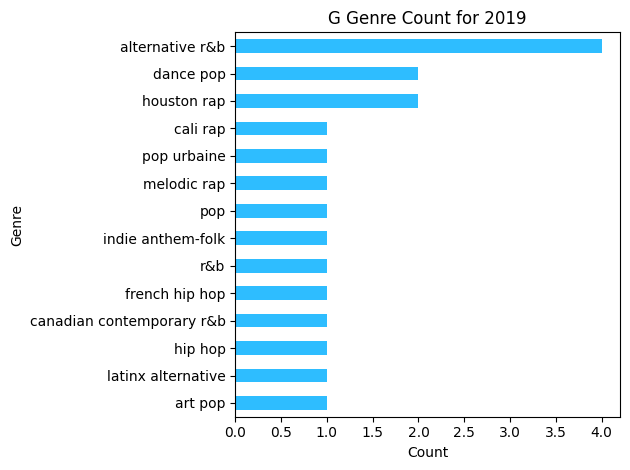

In [356]:
genre_counts = g_2019['genre'].value_counts()

# Sort the genres by their counts in descending order
sorted_genres = genre_counts.sort_values(ascending=True)

# Plot the histogram
hist = sorted_genres.plot(kind='barh', color = '#2EBDFF')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('G Genre Count for 2019')
#plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
valence <- master_df %>%
    select(song, year, genre, valence) %>%
    group_by(genre) %>%
    summarise(mean_valence = mean(valence))

In [374]:
mean_valence_df = master_df.groupby('genre')['valence'].mean().reset_index().sort_values(by='valence', ascending=False)

In [375]:
mean_valence_df.head(30)

,genre,valence
27,bachata,0.964000
66,corrido,0.961000
118,latin rock,0.942000
126,metropopolis,0.864000
147,pop chileno,0.858000
179,venezuelan indie,0.856000
44,cali rap,0.842000
65,contemporary r&b,0.840000
69,dancehall,0.789000
94,funk carioca,0.775000


In [383]:
mean_valence_df_2022 = master_df[master_df['year'] == '2022'].groupby('genre')['valence'].mean().reset_index().sort_values(by='valence', ascending=False).reset_index(drop=True)

In [384]:
mean_valence_df_2022.head(20)

,genre,valence
0,la indie,0.964000
1,countrygaze,0.943000
2,latin rock,0.942000
3,indie soul,0.884000
4,pop chileno,0.858000
5,venezuelan indie,0.856000
6,minneapolis indie,0.739000
7,chilean indie,0.710500
8,mexican indie,0.701500
9,tontipop,0.695000


In [382]:
mean_valence_df_2016 = master_df[master_df['year'] == '2016'].groupby('genre')['valence'].mean().reset_index().sort_values(by='valence', ascending=False).reset_index(drop=True)
mean_valence_df_2016.head(20)

,genre,valence
0,arab alternative,0.757000
1,indie rock,0.735000
2,jazz blues,0.734000
3,indie pop rap,0.729000
4,australian pop,0.684000
5,electropop,0.660000
6,dance pop,0.608500
7,persian neo-traditional,0.550000
8,vapor soul,0.536000
9,pop,0.421100
